# **MATH&ML-5. Математический анализ в контексте задачи оптимизации. Часть II**

# 1. Введение. Функции нескольких переменных

✍ В предыдущем модуле мы познакомились с функцией одной переменной, а также научились её исследовать. Разумеется, функции от одной переменной встречаются в различных задачах, однако на практике мы чаще всего имеем дело с функциями нескольких переменных, то есть, с такими, которые зависят от нескольких параметров. Например, если мы хотим предсказать цену на квартиру, то не будем предсказывать её только на основании площади — мы возьмём площадь, этаж, расстояние до метро, экологию и так далее.

Интересно анализировать именно многомерные функции, ведь они помогают изучать окружающую действительность и прогнозировать интересующие показатели. Мы должны уметь исследовать многомерные функции так же, как и функции одной переменной. Это подводит нас к главной цели — задачам оптимизации. Именно во время решения задач оптимизации мы исследуем поведение функции, ищем для неё производные, находим минимумы и максимумы.

Такая острая необходимость изучать и оптимизировать функции обусловлена тем, что практически все алгоритмы машинного обучения можно рассматривать как вариацию задачи оптимизации. К примеру:

При решении задачи кредитного скоринга мы минимизируем ошибку модели и количество потерянных банком денег.
При создании алгоритма для навигатора — минимизируем время, которое потратит пользователь на дорогу до работы.
При работе в интернет-магазине — минимизируем количество сотрудников колл-центра, необходимых для обслуживания входящих заказов.
При игре на бирже — максимизируем ожидаемую от продажи и покупки акций прибыль.
Задача оптимизации может быть очень сложной, поскольку функция может иметь десятки, сотни, тысячи или даже миллионы входных данных, а структура функции неизвестна, часто недифференцируема и зашумлена.

> Существует функция $n$ переменных $x, y, z, ...$, если по некоторому закону каждой системе $n$ чисел ($x, y, z, ...$) из некоторого множества ставится в соответствие число $u$.

То есть, по сути, относительно функции одной переменной меняется только то, что значение функции зависит от нескольких аргументов, а не от одного:

![](https://lms.skillfactory.ru/assets/courseware/v1/3edbff8f1e8b498b95e52399ed595a84/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_1_1.png)

**Примечание**. Исключением из этого правила являются так называемые **векторнозначные функции**, для которых значением может быть не одно число, а несколько:

$$f(x) = \begin{bmatrix} cos(x) \\ sin(x)\end{bmatrix}$$



Функции, зависящие от нескольких переменных, очень часто используются в разных научных областях и, конечно же, в Data Science.

Например, вспомним метод классификации KNN. В чём его суть? Ее можно выразить фразой: «Скажи мне, кто твой друг, и я скажу, кто ты». Когда мы получаем обучающую выборку, мы располагаем все её объекты на координатной плоскости (или в пространстве) и затем выбираем количество ближайших соседей. Количество соседей является основным решающим фактором. Обычно это нечётное число. Когда $k=1$, алгоритм называется алгоритмом ближайших соседей. Это самый простой случай.

Далее мы получаем новую точку, для которой неизвестен класс и необходимо предсказать метку. Мы отмечаем эту точку на плоскости (или в пространстве) и находим ближайшую к ней точку из обучающей выборки. Мы присваиваем нашей точке метку найденной ближайшей точки.

На рисунке ниже точки одного класса обучающей выборки отмечены красными звёздочками, а точки другого — зелёными треугольниками. Мы получаем новую точку (знак вопроса) и видим, что ближе всего к ней расположена красная звёздочка. Значит, нашей новой точке мы присваиваем такой же класс.

![](https://lms.skillfactory.ru/assets/courseware/v1/21ee3c1cf2dbd2141b42a4aeafd084b5/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_1_2.png)

А что если $k$ больше 1? Предположим, что $P$ — это точка, для которой необходимо предсказать метку. Сначала вы находите $k$ ближайших к $P$ точек, а затем классифицируете точки большинством «голосов» $k$ соседей. Каждый объект «голосует» за свой класс, и класс с наибольшим количеством «голосов» принимается за прогноз. Чтобы найти ближайшие похожие точки, вычисляются расстояния между точками с использованием мер расстояния, таких как **евклидово расстояние**, **расстояние Хэмминга**, **расстояние Манхэттена** и **расстояние Минковского**. 

Итак, алгоритм KNN включает в себя следующие основные шаги:

* Рассчитать расстояния до всех точек.
* Найти ближайших соседей (точки с наименьшим расстоянием).
* Посчитать «голоса» за классы.

![](https://lms.skillfactory.ru/assets/courseware/v1/3e509296d919af7871b34b42531cc66d/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_1_3.png)

Как уже упоминалось, в этом алгоритме необходимо вычислять расстояние между двумя точками. Для этого используются различные функции нескольких переменных. Рассмотрим самую популярную — **евклидово расстояние**.

Если говорить про евклидово расстояние для двух переменных, то его функция записывается как $f(x) = \ \sqrt{x^2 + y^2}$ и вычисляет корень из суммы квадратов $x$ и $y$. Это не что иное, как расстояние от точки $(x, y)$ до начала координат или длина вектора с координатами $(x, y)$. В качестве области определения для такой функции могут выступать **любые вещественные числа**, а её областью значений являются **все неотрицательные числа**.

**Евклидово расстояние до начала координат:**

$f(x,y) = \sqrt{x^2 + y^2} = \rho (M(x,y), O(0,0)) = \left\|\overrightarrow{r} \right\|$

![](https://lms.skillfactory.ru/assets/courseware/v1/3fc0a0d83572bc36e64a95b6d514d1f2/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_1_4.png)

Также евклидово расстояние можно использовать для того, чтобы найти **расстояние между двумя точками**:

$f(x,y) = \sqrt{(x-1)^2 + (y-8)^2} = \rho (M(x,y), A(1,8))$

![](https://lms.skillfactory.ru/assets/courseware/v1/e82a6a6f1586460b83b1b11779469ffd/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_1_5.png)

Также функцией нескольких переменных является квадратичная функция потерь или, как её ещё называют, $L^2$-loss функция:

$$L^2 LossFunction = \sum_{i=1}^{n} (y_{true} - y_{predicted})^2$$

Эта функция находит сумму квадратов всех ошибок, то есть, сумму квадратов разностей между реальным значением и значением, предсказанным моделью. Вы уже сталкивались с ней, так как она используется для построения и оценки качества в линейных регрессиях (в методе наименьших квадратов), а также для метода обратного распространения ошибки, применяемого в нейронных сетях.

→ Так как эта функция выражает величину отклонения от истины, нам очень важно уметь её исследовать и находить её минимальное значение, чтобы достигать максимально точных предсказаний.

В качестве аргументов функция $L^2$-loss принимает любые вещественные числа, а её значения могут быть любыми неотрицательными числами.

Реальные|6|7|6|4|5|6|8
-|-|-|-|-|-|-|-
Предсказанные|6.4|7.1|5.9|4.2|5.2|6.2|7.5

### Задание 1.7

Пусть у нас есть реальные и предсказанные значения в некоторой прогностической модели.

Найдите значение метрики $L^2$-loss:

In [291]:
import numpy as np
y_true = np.array([6, 7, 6, 4, 5, 6, 8])
y_predict = np.array([6.4, 7.1, 5.9, 4.2, 5.2, 6.2, 7.5])
sum((y_true - y_predict)**2)

0.5500000000000004

Вспомним ещё одну функцию, с которой мы уже сталкивались в одномерном случае — это **сигмоида**. Сигмоида является функцией активации нейрона, которая используется при обучении нейронных сетей. Её вариацией является **логистическая функция**, используемая для решения задачи классификации. Если параметров много, то, разумеется, мы получаем её как функцию многих переменных:

$E(y) = \frac{\alpha}{(1 + e^{-(\beta_0 + \beta_1 x_1  + \beta_2 x_2)})}$

Ровно так же, как и одномерная, она может принимать любые значения от 0 до 1 не включительно, и в качестве её аргументов могут выступать любые вещественные числа.

Это лишь несколько примеров функций многих переменных, которые могут вам встретиться. Разумеется, в прикладных задачах вы будете сталкиваться с самыми разным вариантами зависимостей. Их спектр огромен. Например, вы уже умеете работать со случаями линейной зависимости — именно такой зависимостью является линейная регрессия. В логистической регрессии вы уже поработали с сигмоидальной функцией. Если вы будете предсказывать экономические процессы, то встретитесь с экспоненциальной зависимостью, а если решите предсказать временной ряд, вам понадобится логарифмическая функция. В зависимости от области знаний и ситуации вы будете постоянно работать с различными функциональными зависимостями — для любого кейса важно уметь найти подход.

В следующих юнитах мы научимся исследовать и оптимизировать зависимости разных видов.

## ЦЕЛИ НА ДАННЫЙ МОДУЛЬ:

* научиться вычислять частные производные для функций нескольких переменных;
* научиться находить безусловные и условные экстремумы для функции нескольких переменных;
* узнать и понять основную терминологию, связанную с задачами оптимизации;
* понять принцип работы градиентного спуска;
* научиться применять градиентный спуск для решения практических задач.

Для достижения каждой цели мы будем изучать всю необходимую теорию, рассматривать применимость данных знаний для решения задач из DS и закреплять полученные знания на практических заданиях.

### Задание 1.9

$f(x_1, x_2, x_3) = \frac{1}{1 + e^{-2(x_1 + x_2 + x_3)}}$

2. Вычислите $f(1,1,0)$. Ответ округлите до второго знака после точки-разделителя.



In [292]:
import math

round(1/(1+math.exp(-2*(1+1+0))),2)

0.98

3. На вход нейрона $А$ в искуственной нейросети поступает три сигнала: $x_1, x_2 \ и \ x_3$. Выходной сигнал определяется сигмоидальной функцией активации $f(x_1, x_2, x_3)$. Какое число будет на выходе нейрона $А$, если на вход поступят $x_1=0.1$, $x_2=0.3$, $x_3=0.6$. Ответ округлите до второго знака после точки-разделителя.

In [293]:
round(1/(1+math.exp(-2*(0.1 + 0.3 + 0.6))),2)

0.88

### Задание 1.10

В модели линейной регрессии три наблюдения:

$x_1 = 1, x_2 = 3, x_3 = 5$

$y_1 = 2.1, y_2 = 2.9, y_3 = 4.1$

$\hat{y} = w_0 + w_1 x$

3. Найдите значение $L^2$-loss функции, если $w_0 = 1, w_1 = 1$





In [294]:
x = np.array([1, 3, 5])
y_true = np.array([2.1, 2.9, 4.1])
w_0 = 1
w_1 = 1
y_pred = w_0 + w_1*x
sum((y_true - y_pred)**2)

4.830000000000002

# 2. Частные производные

✍ Мы разобрались с тем, что такое функция многих переменных. Теперь давайте научимся дифференцировать такие функции, т. е. находить для них производные.

> Производные для функций нескольких переменных называются **частными производными**.

На данный момент в машинном обучении очень популярны и эффективны методы глубокого обучения, то есть методы, использующие нейронные сети. В обучении нейронных сетей есть два важных этапа:

* **Прямое распространение ошибки** (на этом этапе нейронная сеть предсказывает результат).
* **Обратное распространение ошибки** (на этом этапе нейронная сеть минимизирует разницу между реальным значением и предсказанным).

Именно на втором шаге большую роль играют частные производные, так как позволяют узнать, каков вклад каждого признака в ошибку, и это даёт возможность точно настроить модель.

Представьте, что вы решаете много задач по математике: в каких-то ваш ответ абсолютно верен, в каких-то вы ошиблись на сотые, а в каких-то ошибка довольно значительна. Если теперь посчитать, на сколько в среднем вы ошиблись, и вычесть эту среднюю ошибку из всех ответов, скорее всего, все ответы станут неверными. Почему так? Потому что необходимо рассматривать ответ в каждой задаче независимо от других.

Так же и в построении модели очень важно иметь возможность рассматривать вес каждого признака независимо и настраивать его отдельно — именно за это отвечают частные производные. Без них пришлось бы корректировать все параметры одновременно и одинаково, и мы бы никогда не получили нормальную модель. Если вы захотите углубиться в изучение различных архитектур нейронных сетей и в принцип их работы в целом, то обязательно столкнётесь с математической записью этого процесса, которая будет содержать в себе частные производные.

Итак, мы обсудили, зачем нужны частные производные — теперь можно учиться их находить ↓

Вероятно, вы помните, что обычную производную для функции одной переменной мы обозначали как $\frac{df}{dx}$. Эту запись можно интерпретировать следующим образом: «Очень маленькое изменение значения функции $f$, произошедшее вследствие очень маленького изменения аргумента $x$».

![](https://lms.skillfactory.ru/assets/courseware/v1/a6773e7961da8f513fa54d616f79cbf9/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_2_1.png)

Важно интуитивно понимать это обозначение, так как оно поможет нам проще разобраться с понятием частных производных.

Давайте перейдём к функциям нескольких переменных и начнём с **функции двух переменных**. Например, с такой:

$f(x,y) = x^2 - 2xy$

Ничто не мешает нам написать такое же выражение $\frac{df}{dx}$, которое и в этом случае можно будет интерпретировать абсолютно так же: «Очень маленькое изменение значения функции $f$, произошедшее вследствие очень маленького изменения аргумента $x$». Но тут появляется нюанс: существование аргумента $y$. Теперь у данных, к которым применяется функция, несколько измерений, а значит изменения могут происходить в нескольких направлениях: то есть мы можем поменять не только $x$, но и немного поменять $y$, вследствие чего значение функции также изменится и мы получим другую производную: $\frac{df}{dy}$.

Разберём пример дифференцирования следующей функции:

![](https://lms.skillfactory.ru/assets/courseware/v1/3e329fb52790f34b1d59dadf2dd670ba/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_2_2.png)

Предположим, мы хотим посчитать производную для этой функции в точке $(3;2)$. Механизм этого действия будет ровно такой же, как и с одномерной функцией.

Вспомним, что производная характеризует скорость изменения одной величины при изменении другой.

Найдём производную по $x$ или, проще говоря, скорость изменения функции: если $x$ изменяется, а $y$ остаётся на месте, то есть, например, если мы перемещаемся из точки $(3;2)$ в точку $(3.01;2)$. Так как $y$ не меняется, мы могли бы сразу заменить его значение в функции на константное:

$x^2 \cdot 2^3 = x^2 \cdot 8$

Теперь мы можем найти производную так, как будто это функция одной переменной.

Разумеется, необязательно искать производные в определённых точках — мы можем, как и в случае с одномерными функциями, находить значения производных в общем виде.

Можно сказать, что мы ищем производную для функции $f(x,y) = x^2 y^3$ именно по $x$. Таким образом, значение функции будет меняться вследствие изменения значения $x$, а значение переменной $y$ будет оставаться прежним. Раз значение $y$ не будет изменяться, мы можем воспринимать его как константу.

![](https://lms.skillfactory.ru/assets/courseware/v1/d74a288758a4708aef915412e76b87af/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_2_3.png)

Иногда для того, чтобы подчеркнуть, что это именно многомерная функция, используют следующую запись:

![](https://lms.skillfactory.ru/assets/courseware/v1/d33f93ae53a9e23cd55fb5ae42c0747c/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_2_4.png)

Есть ли разница в записи между $\frac{d}{dx}$ и $\frac{\partial}{\partial x}$? На самом деле нет, хотя если быть очень педантичными, то можно сказать, что первый вариант используется скорее для функции одной переменной, а второй — для функций нескольких переменных. Но в литературе вы можете встретить оба варианта, и их стоит воспринимать одинаково.

Также вы можете встретить (в том числе и в наших юнитах) следующие общепринятые обозначения:

![](https://lms.skillfactory.ru/assets/courseware/v1/ae8e4e20225c7bf3d4410ccfbc8ace01/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_2_5.png)

Это можно прочитать как «производная от функции $f$ по $x$» или «производная от функции $f$ по $y$» (в зависимости от переменной). Вне зависимости от формы записи, читаются они одинаково, и обе являются верными.

Конечно, для вывода понятия частной производной можно использовать **геометрическую интерпретацию**. В предыдущем модуле мы уже выяснили, что значение производной в точке равняется тангенсу угла наклона касательной, проведённой в этой точке к графику функции. Но график функции многих переменных — это поверхность, поэтому у неё таких касательных — целая касательная плоскость. Получается, что у функции есть по касательной для каждого направления, а значит и по своей частной производной, так как внутри плоскости можно провести множество касательных.

![](https://lms.skillfactory.ru/assets/courseware/v1/dbf7658e9ffb1da9e5479473f45bdb8b/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_2_6.png)

Из всех направлений можно выбрать **каноничные** — параллельные координатным осям. Для нас это будет оптимальным решением, так как мы хотим рассмотреть изменение функции только в зависимости от изменения одной из переменных (например, только от $x$ или только от $y$). И если мы, к примеру, берём направление, параллельное оси абсцисс, в таком случае мы фиксируем координату по оси ординат (т. е. воспринимаем её как константу — она одинакова в каждой точке прямой, параллельной оси x). Можно варьировать значение $x$. Так мы и поступим и посмотрим, как меняется функция вдоль оси x. На рисунке ниже это изменение изображено красной кривой.

![](https://lms.skillfactory.ru/assets/courseware/v1/ad320ef1043b970541a480795283afea/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_2_7.png)

Отношение приращения вдоль красной кривой к приращению $x$ — и есть значение частной производной по $x$:

$$\frac{\partial f}{\partial x} \approx \frac{f(x_0 + \Delta x, y_0) - f(x_0, y_0)}{\Delta x}$$

Теперь из всей касательной плоскости можно найти прямую, соответствующую этой красной линии. Тангенс её наклона будет равен частной производной по $x$. 

Итак, можно сказать, что **алгоритм поиска частной производной** аналогичен алгоритму поиска обычной производной для одномерного случая.

Пусть дана функция. Чтобы найти частную производную по переменной $x_i$:

* Фиксируем все переменные, кроме $x_i$.
* Считаем приращение функции при изменении только этой переменной.
* Делим приращение из пункта 2 на приращение нашей переменной.
* Уменьшаем $\Delta x_i$ и получаем $\frac{df}{dx_i}$.

В пункте 1 этого алгоритма указано, что мы фиксируем все переменные, кроме одной. Несмотря на то что в разобранных примерах мы рассматривали функции, зависящие от двух аргументов, ровно таким же образом мы можем найти частные производные и для функций трёх, четырёх и более переменных. Такую функцию мы рассмотрим чуть позже.

Разберём ещё несколько примеров нахождения частных производных ↓

**Пример № 1**

*Найти обе частные производные для функции $f(x,y) = cos(x^2 y) + y^3$.*

Для начала найдём производную по $x$ — $f'_x$.

Фиксируем  как константу и дифференцируем:

$f'(x) = (cos(x^2 y))'_x + (y^3)'_x = -sin(x^2 y) \cdot (x^2 y)'_x + 0 =$

$= -sin(x^2 y) \cdot 2xy = -2xy \cdot sin(x^2 y)$

Повторим то же самое для $y$:

$f'(y) = (cos(x^2 y))'_y + (y^3)'_y = -sin(x^2 y) \cdot (x^2 y)'_y + 3y^2 =$

$= -sin(x^2 y) \cdot x^2 + 3y^2 = -x^2 \cdot sin(x^2 y) + 3y^2$

**Пример № 2**

*Найти обе частные производные для функции $f(x,y) = e^{x^2 + y^2}$.*

Найдём частную производную по $x$:

$f'(x) = (e^{x^2 + y^2})'_x = e^{x^2 + y^2} \cdot (x^2 + y^2)'_x = e^{x^2 + y^2} \cdot 2x$

Найдём частную производную по $y$:

$f'(y) = (e^{x^2 + y^2})'_y = e^{x^2 + y^2} \cdot (x^2 + y^2)'_y = e^{x^2 + y^2} \cdot 2y$

**Пример № 3**

*Найти обе частные производные для функции $f(x,y) = \frac{1}{xy}$.*

Найдём частную производную по $x$:

$f'(x) = \left ( \frac{1}{xy} \right )'_x = \left ( \frac{1}{y} \cdot x^{-1} \right )'_x = - \frac{1}{y} \cdot x^{-2} = - \frac{1}{x^2 y}$

Найдём частную производную по $y$:

$f'(x) = \left ( \frac{1}{xy} \right )'_y = \left ( \frac{1}{y} \cdot x^{-1} \right )'_y = - \frac{1}{x} \cdot y^{-2} = - \frac{1}{y^2 x}$



**Пример № 4**

*Найти все частные производные для функции $t(x,y,z) = xe^y + ye^z$.*

Найдём частную производную по $x$:

$t'_x = (xe^y + ye^z)'_x = (x \cdot e^y)'_x + (y \cdot e^z)'_x =$

$= (x)'_x \cdot e^y + x \cdot (e^y)'_x = 1 \cdot e^y + x \cdot 0 = e^y$

Найдём частную производную по $y$:

$t'_y = (x \cdot e^y + y \cdot e^z)'_y = (x \cdot e^y)'_y + (y \cdot e^z)'_y =$

$= x \cdot (e^y)'_y + e^z \cdot (y)'_y = x \cdot e^y + e^z$

Наконец, дифференцируем функцию по $z$:

$t'_z = (x \cdot e^y + y^z)'_z = (x \cdot e^y)'_z + (y \cdot e^z)'_z =$

$= 0 + y \cdot (e^z)'_z = y \cdot e^z$



Так же, по аналогии с одномерными функциями, мы можем найти и вторые частные производные.

Для вторых производных используются следующие обозначения:

![](https://lms.skillfactory.ru/assets/courseware/v1/94b5f6c44479ce540638e25a76da763a/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_2_8.png)

Также могут использоваться такие вариации:

![](https://lms.skillfactory.ru/assets/courseware/v1/42b90a0b6192ca68dd82618f50a243b0/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_2_9.png)

Рассмотрим пример вычисления всех вторых частных производных для функции $f(x,y) = sin(x) y^2$.

Для начала вычислим первые частные производные по $x$ и по $y$:

![](https://lms.skillfactory.ru/assets/courseware/v1/4d87f68d02066a3999aa3b14ebab2cbf/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_2_10.png)

Теперь для каждой из двух частных производных возьмём ещё по две частных производных, чтобы получить все четыре возможных частных производных:

![](https://lms.skillfactory.ru/assets/courseware/v1/20a8cb6745d65690c9df4977bdc0d3ae/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_2_11.png)

Можно заметить, что **значения смешанных производных** (когда ищем производную сначала по одной переменной, а затем — по другой) **совпадают**. Это свойство очень поможет нам при поиске минимумов и максимумов функции, так как сильно упростит расчёты: получается, что для функции с двумя переменными нужно вычислить не четыре производных, а только три. Уже в следующем юните вы сможете по достоинству оценить, как это упростит вам жизнь и сократит длительность вычислений.

![](https://lms.skillfactory.ru/assets/courseware/v1/5f884a606d6bff003f75b99d1a387d93/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_2_12.png)

Примеры, которые мы разбирали выше, подразумевали, что переменные, от которых зависит наша функция, являются независимыми. Но что, если они тоже зависят друг от друга?

В таком случае мы можем найти **полную производную**, то есть производную, в которой учитываются зависимости между переменными. По сути, задача поиска полной производной сводится к замене одной из переменных на функциональную зависимость от другой и поиск производной по единственной оставшейся переменной.

**Пример № 5**

*Найти полную производную для функции $f(x,y) = x^2 + y^2$ по $x$, если $y = lnx$.*

$f(x,y(x)) = x^2 + y^2(x) = x^2 + (ln \ x)^2$

$\frac{df(x,y(x))}{dx} = (x^2 + y^2(x))'_x = 2x + 2y \cdot y' = 2x + 2ln \ x \cdot \frac{1}{x}$

Разумеется, мы можем вычислять частные производные с помощью уже известной нам библиотеки SymPy. По сути, в коде ничего не меняется — надо лишь не забыть указать, по какой переменной вы ищете производную.

Например, попробуем найти производную для функции $f(a,b,c) = 5ab - a*cos(c) + a^2+c^8*b$ по переменной $a$:

In [295]:
from sympy import symbols, cos, diff

a, b, c = symbols('a b c', real=True)
f = 5*a*b - a*cos(c) + a**2 + c**8*b

print(diff(f, a))

2*a + 5*b - cos(c)


Дальнейшие задания вы можете выполнять как вручную, так и с помощью SymPy, однако рекомендуем на первых порах использовать оба инструмента для самопроверки, а не ограничиваться только одним.

### Задание 2.3

$f(x,y) = x^2 − y^2$

1. Чему равны частные производные $f(x,y)$?

In [296]:
x, y = symbols('x y', real=True)
f = x**2 - y**2

print(diff(f, x))

print(diff(f, y))

2*x
-2*y


2. Вычислите частные производные в точке $M(−2,−1)$:

In [297]:
diff(f, x).subs(x, -2)

-4

In [298]:
diff(f, y).subs(y, -1)

2

# 3. Безусловные экстремумы. Функции нескольких переменных

✍ Теперь, когда мы научились находить частные производные, можно перейти к поиску экстремумов (то есть минимумов и максимумов) для функций нескольких переменных.

Как мы помним из предыдущего модуля, нахождение экстремумов даёт возможность минимизировать функцию, так как в реальных задачах функционал ошибки может быть довольно сложным. Например, он может предстать в таком виде:

![](https://lms.skillfactory.ru/assets/courseware/v1/267ddb27f442169cd423a76033b7bb10/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_3_1.png)

→ Нам важно найти самую низкую точку (т. е. наименьшее значение функции), чтобы понять, при каких параметрах ошибка будет минимальной, а значит качество модели будет максимально возможным.

Так же, как и у функции одной переменной, у функции нескольких переменных могут быть локальные и глобальные минимумы и максимумы:

![](https://lms.skillfactory.ru/assets/courseware/v1/a0ee522dd9986580a580d451aea28ae3/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_3_2.png)

К счастью, методы нахождения экстремумов для функций нескольких переменных похожи на методы, которые мы использовали в вычислении с одной переменной.

Рассмотрим алгоритм поиска минимумов и максимумов для функции нескольких переменных $f(x,y) = x^2 - 10x + y^2 -12y + 71$.

1. На первом этапе необходимо найти частные производные этой функции:

    $f_x(x,y) = 2x-10$

    $f_y(x,y) = 2y-12$

2. На втором этапе мы находим точки, в которых эти производные принимают нулевые значения:

    $2x-10 = 0$|
    
    $2x=10$

    $x=5$

    $2y-12 = 0$

    $2y = 12$

    $y=6$

    Итак, мы получили точку $(5,6)$ — это стационарная точка.

    В этой точке может быть **максимум**,

    ![](https://lms.skillfactory.ru/assets/courseware/v1/b06738e86b19b36302a2db6e8499ea60/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_3_3.png)

    **минимум**

    ![](https://lms.skillfactory.ru/assets/courseware/v1/ea8bcb2d9d24c6e17f90e38a1ef1c345/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_3_4.png)

    или **седловая точка**, в которой производная меняет знак, но которая не является экстремумом:

    ![](https://lms.skillfactory.ru/assets/courseware/v1/04497fcd3a1391413082f00e210b9bee/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_3_5.png)

3. Наконец, переходим к третьему шагу — определению того, чем будет являться стационарная точка.

    В одномерном случае нам удалось обойтись только первой производной для определения характера точек экстремума. Для функции двух переменных этого недостаточно — нам понадобится новый инструмент, **матрица Гессе**. Помимо оптимизации, она пригодится для определения характера выпуклости функции многих переменных.

    > **Матрица Гессе** — это матрица вторых частных производных.

    Матрица Гессе для функции двух переменных выглядит так:

    ![](https://lms.skillfactory.ru/assets/courseware/v1/2e04e33673463b6784b339c6c0d209ca/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_3_6.png)

    Интересно, что, несмотря на большую важность матрицы Гессе как промежуточного итога в решениях задачи оптимизации, есть и отдельные области, где она применяется как самостоятельный инструмент. Например, она используется в финансовых вычислениях (в риск-менеджменте и для управления портфелями): c её помощью оценивают, насколько опцион подвержен риску. В вычислительной химии матрица Гессе используется для расчётов переходных состояний в химических реакциях.

Рассмотрим пример составления матрицы Гессе для нашей функции:

$f'x = 2x - 10, \ f'y = 2y - 12$

$f''_{xx} = (2x- 10)'_x = 2$

$f''_{xy} = (2x - 10)'_y = 0$

$f''_{yx} = (2y - 12)'_x = 0$

$f''_{yy} = (2y - 12)'_y = 2$

$Hesse = \begin{pmatrix} 2 & 0 \\ 0 & 2 \\ \end{pmatrix}$

Теперь нам необходимо вспомнить линейную алгебру, так как критерии для максимума и минимума следующие:

* Если матрица Гессе положительно определена в этой точке, то в ней находится минимум.
* Если матрица Гессе отрицательно определена в этой точке, то в ней находится строгий максимум.
* В иных случаях точка является седловой.

→ Напомним, что для того, чтобы матрица была положительно определённой, необходимо, чтобы все её угловые миноры либо все собственные значения были положительными. А для того, чтобы матрица была отрицательно определённой, необходимо, чтобы знаки угловых миноров чередовались, начиная с отрицательного, либо чтобы все собственные значения были отрицательными.

В нашем случае знак первого углового минора положителен (его значение равно 2), как и знак второго углового минора (его значение равно 4). Оба собственных значения также положительны (оба равны 2). Это значит, что в данной точке находится минимум.

***Пример № 1***

*Исследовать на экстремумы функцию $f(x) = -x^2 + 6x - 2y^2 + 4y$*

1. Найдём частные производные функции и приравняем их к нулю:

    $f'(x) = (-x^2 + 6x - 2y^2 + 4y)'_x = -2x + 6 - 0 + 0 = -2x + 6 = 0$

    $f'(y) = (-x^2 + 6x - 2y^2 + 4y)'_y = 0 + 0 -4y + 4 = -4y + 4 = 0$

    $\left\{\begin{matrix} f'_x = -2x + 6 = 0\\ f'_y = -4y + 4 = 0\end{matrix}\right.$

2. Найдём координаты для стационарной точки, то есть, такие значения $x$ и $y$, в которых частные производные принимают нулевые значения:

    $\left\{\begin{matrix} x = 3\\ y = 1\end{matrix}\right.$

3. Составим матрицу Гессе:

    $f''_{xx} = (-2x + 6)'_x = -2$

    $f''_{xy} = f''_{yx} = (-2x + 6)'_y = 0$

    $f''_{yy} = (-4y + 4)'_y = -4$

    $Hesse = \begin{pmatrix} f''_{xx} & f''_{xy}\\ f''_{yx} & f''_{yy}\\ \end{pmatrix} = \begin{pmatrix} -2 & 0\\ 0 & -4\\ \end{pmatrix}$

4. Найдём собственные значения и определим характер точки:

    $\begin{vmatrix} -2 - \lambda & 0\\ 0 & -4 - \lambda\\ \end{vmatrix} = 0$

    $(-2 - \lambda)(-4 - \lambda) = 0$

    $\lambda = -2 \ \lambda = -4$

    Собственные числа:

    $\lambda_1 = -2 < 0$

    $\lambda_2 = -4 < 0$

    Таким образом, матрица Гессе определена отрицательно, а значит $M(3;1)$ — точка локального максимума.

***Пример № 2***

*Найти экстремумы для функции $z = x^3 + 3xy^2 -15x - 12y + 1$.*

1. Найдём частные производные функции и приравняем их к нулю:

    $z'_x = 3x^2 + 3y^2 - 15$

    $z'_y = 6xy - 12$

    $\left\{\begin{matrix} 3x^2 + 3y^2 - 15 = 0\\ 6xy - 12 = 0\end{matrix}\right.$

2. Теперь можно, к примеру, выразить $x$ из второй строки через $y$ (или наоборот) и подставить результат в первую либо воспользоваться библиотекой SymPy для решения уравнений:



In [299]:
from sympy import *
 
x, y = symbols('x, y')
eq1 = Eq(3*x**2+3*y**2-15,0)
eq2 = Eq(6*x*y-12, 0)

sol = solve([eq1, eq2], [x, y])

sol

[(-2, -1), (-1, -2), (1, 2), (2, 1)]

В итоге получим четыре стационарные точки — $M_1 (1;2), M_2 (-1;-2), M_3 (2;1), M_4 (-2;-1)$. Для нас это нечто новое. Составим матрицу Гессе в общем виде, а затем будем подставлять каждую точку и определять, чем она является.

3. Найдём частные производные второго порядка и составим матрицу Гессе:

    $z''_{xx} = (3x^2 + 3y^2 - 15)'_x = 6x$

    $z''_{xy} = z''_{yx} = (3x^2 + 3y^2 - 15)'_y = 6y$

    $z''_{yy} = (6xy - 12)'_y = 6x$

    $Hesse = \begin{pmatrix} 6x & 6y\\ 6y & 6x\\ \end{pmatrix}$

Итак, мы научились решать задачу поиска безусловного экстремума функции нескольких переменных. Теперь вы сможете исследовать абсолютно любую функцию на максимумы и минимумы.

Также иногда мы можем определить, что минимум или максимум являются глобальными. Для этого необходимо помнить следующее:

* Если других экстремумов нет, то экстремум глобальный.
* Если $E_f$ уходит в $+\infty$, глобального максимума не будет.
* Если $E_f$ уходит в $+\infty$, глобального минимума не будет.
* У выпуклых функций локальный экстремум является глобальным.

### Задание 3.4

Найдите экстремумы функции $z = 4x^2 - 6xy -34x + 5y^2 + 42y + 7$.


In [300]:
from sympy import *
 
x, y, z = symbols('x, y, z')

z = 4*x**2 - 6*x*y - 34*x + 5*y**2 + 42*y + 7

eq1 = Eq(diff(z, x),0)
eq2 = Eq(diff(z, y), 0)

solve([eq1, eq2], [x, y])

{x: 2, y: -3}

### Задание 3.5

Вычислите матрицу Гессе для функции $f(x,y) = x^3 - 2xy - y^6$ в точке $(1;2)$ и найдите её определитель.

In [301]:
z = x**3 - 2*x*y - y**6

d_xx = diff(diff(z,x), x)
d_xy = diff(diff(z,x), y)
d_yy = diff(diff(z,y), y)

import numpy as np
from numpy import linalg 

H= np.array(([float(d_xx.subs(x, 1)), float(d_xy)],
             [float(d_xy), float(d_yy.subs(y, 2))]))

np.linalg.det(H)



-2884.0000000000014

### Задание 3.9

Найдите экстремумы функции $z = x^3 + y^3 - 3xy$.

Запишите координаты точки минимума:

In [302]:
x, y, z = symbols('x, y, z')

z = x**3 + y**3 - 3*x*y

eq1 = Eq(diff(z, x),0)
eq2 = Eq(diff(z, y), 0)

solve([eq1, eq2], [x, y])

[(0, 0),
 (1, 1),
 ((-1/2 - sqrt(3)*I/2)**2, -1/2 - sqrt(3)*I/2),
 ((-1/2 + sqrt(3)*I/2)**2, -1/2 + sqrt(3)*I/2)]

# 4. Введение в оптимизацию

✍ Мы познакомились с основными понятиями и методами математического анализа и можем перейти к более интересной и приближенной к DS области математики — **оптимизации**.

> **Оптимизация функций** — это задача нахождения набора входных данных целевой функции (то есть её аргументов), которые приводят к минимуму или максимуму функции.

С такой задачей в Data Science сталкиваются практически постоянно. В литературе даже можно встретить утверждение, что Data Science стоит на «трёх китах математики»:

* линейной алгебре;
* математической статистике;
* оптимизации.

→ По сути, каким бы методом анализа данных вы ни воспользовались, вам всё равно придётся решать задачу оптимизации, ведь в абсолютно любой модели возникает необходимость настроить гиперпараметры таким образом, чтобы получить наилучшую эффективность. Последняя для нас заключается в том, чтобы ошибаться как можно меньше. Оптимизация как раз и поможет нам подобрать параметры для минимизации ошибки.

Если сформулировать очень кратко, то задача оптимизации заключается в том, чтобы найти максимум или минимум функции:

$$min \ f(x)$$

$$max \ f(x)$$

При этом функция  может принимать на вход одну переменную, вектор из нескольких переменных или другой объект, но возвращать всегда будет число. Функция может быть абсолютно любой, например:

* элементарной функцией;
* функцией потерь модели предсказаний (например, количество топлива, которое потратит грузовик, если будет ехать по маршруту $x$, или заработная плата в зависимости от времени, потраченного на обучение).

Как правило, необходимо найти значение функции и аргумента , который приводит к оптимальному значению.

Иногда на $x$ накладывается какое-нибудь дополнительное условие:

$$min_{a<x<b} \ f(x)$$

$$min_{g(x) \geq 0} \ f(x)$$

Например, нельзя потратить на обучение отрицательное количество часов. Также невозможно тратить на это больше 24 часов в сутки.

Чаще всего ограничение выражается равенством или неравенством на другую функцию от $x$. Например, грузовики должны проехать по всем пунктам маршрута, т. е. имеем ограничение «количество посещённых пунктов равно 10» или «количество посещённых пунктов минус 10 = 0».

Задачу на нахождение максимума можно свести к задаче на нахождение минимума, т. к. максимум функции соответствует минимуму функции со знаком минус

$$max \ f(x) \Leftrightarrow min(-f(x))$$

→ Мы будем говорить **только о минимизации**.

За счёт такой общей постановки задачи задачу оптимизации можно встретить во всех областях, где применяется математика.

Резюмируя, можно сказать, что задачу оптимизации можно охарактеризовать **тремя составляющими**:

**Целевая функция ($f(x)$)**

Первая составляющая задачи оптимизации — это целевая функция $f(x)$, которую мы пытаемся максимизировать или минимизировать. Например, это может быть функция ошибки в модели или функция, которая выражает зависимость размера прибыли от каких-то факторов.

Как уже было сказано ранее, случаи максимизации мы будем приводить к минимизации.

**Переменные функции ($x$)**

Вторая составляющая нашей задачи — это те аргументы, которые можно варьировать, чтобы достигнуть минимума функции, то есть, переменные, от которых зависит значение этой функции.

**Ограничения ($a ≤ x ≤ b$)**

Третий компонент — это ограничения, которые накладываются на аргументы. Это могут быть равенства или неравенства, определяющие возможные значения для аргументов.

На данных компонентах основано множество классификаций задач оптимизации:

**Задачи безусловной и условной оптимизации**

Это задачи, где не накладывается никаких дополнительных ограничений и задачи, где ограничения есть, соответственно.

**Задачи гладкой и негладкой оптимизации**

> **Гладкой** называют функцию, у которой можно найти производную в любой точке.

При подборе метода решения задачи необходимо выяснить:

есть ли явные ограничения на гладкость (например, в ходе оптимизации используются производные, а значит важно, чтобы их можно было найти);
есть ли менее явные ограничения на гладкость (к примеру, производные не используются и метод можно реализовать, однако его реализация предполагает, что эффективность будет достигнута только в случае гладких функций).

**Задачи локальной и глобальной оптимизации**

В случае решения задачи локальной оптимизации нам подойдёт любой минимум, а для глобальной — только точка глобального минимума.

![](https://lms.skillfactory.ru/assets/courseware/v1/47947b0049bb2ca47183bc99f1570a40/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_4_1.png)

## ПРАКТИКА В PYTHON

Мы обсудили постановку задачи оптимизации в целом. Чтобы сразу попрактиковаться, давайте решим несложную задачу, пока особо не вникая в суть алгоритмов.

Для того чтобы решать задачи оптимизации с помощью Python, можно использовать пакет **SciPy Optimize (scipy.optimize)** библиотеки SciPy. Он позволяет реализовывать все основные методы оптимизации, которые чаще всего используются в прикладных задачах.

→ О том, как выбрать наиболее подходящий метод, мы поговорим в следующем модуле, но заранее можно обозначить, что универсальных алгоритмов, которые подходили бы под все задачи, просто не существует, поэтому важно понимать ограничения и область применения каждого метода. В конце следующего модуля мы обобщим все пройденные методы.

Чтобы реализовать метод оптимизации, нужна функция, для которой его будут применять. Мы возьмём самую известную функцию, используемую для таких целей — [функцию Розенброка](https://ru.wikipedia.org/wiki/%D0%A4%D1%83%D0%BD%D0%BA%D1%86%D0%B8%D1%8F_%D0%A0%D0%BE%D0%B7%D0%B5%D0%BD%D0%B1%D1%80%D0%BE%D0%BA%D0%B0). Данную функцию можно представить так:

$$f(x) = \sum_{i=1}^{N-1} \left [ 100 (x_{i+1} - x_{i}^{2})^2 + (1 - x_{i})^2 \right ]$$



Функция Розенброка, или, как её ещё называют, **функция банана** или **функция долины**, является популярной тестовой задачей для алгоритмов оптимизации на основе градиента. Вы встретитесь с ней ещё не раз, так как её часто используют в качестве эталонного теста для оценки методов оптимизации. Интересно, что придумана она была в 1960 году, то есть уже более 60 лет её используют подобным образом. Мы берём именно эту функцию, потому что она оптимальна для проверки качества алгоритмов.

Глобальный минимум  этой функции находится внутри вытянутой плоской долины (отсюда и альтернативное название функции), которая по форме напоминает параболу. Найти долину легко, чего не скажешь о глобальном минимуме для этой функции.

Давайте определим данную функцию:

In [303]:
import numpy as np
 
def func_rosen(x):
    r = np.sum(100*(x[1:]-x[:-1]**2)**2 + (1-x[:-1])**2, axis=0)
    return r

Чтобы лучше понять, что из себя представляет данная функция, изобразим её график для случая двух переменных (тогда у нас будет три измерения, и график будет в 3D). В целом, можно было бы взять и большее количество переменных — несомненный плюс этой функции как раз и состоит в возможности использовать многомерные случаи любых размерностей. Однако случай для двух аргументов будет легко представить визуально.

C:\Users\Home\AppData\Local\Temp/ipykernel_10152/1091274950.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = graph.gca(projection='3d')


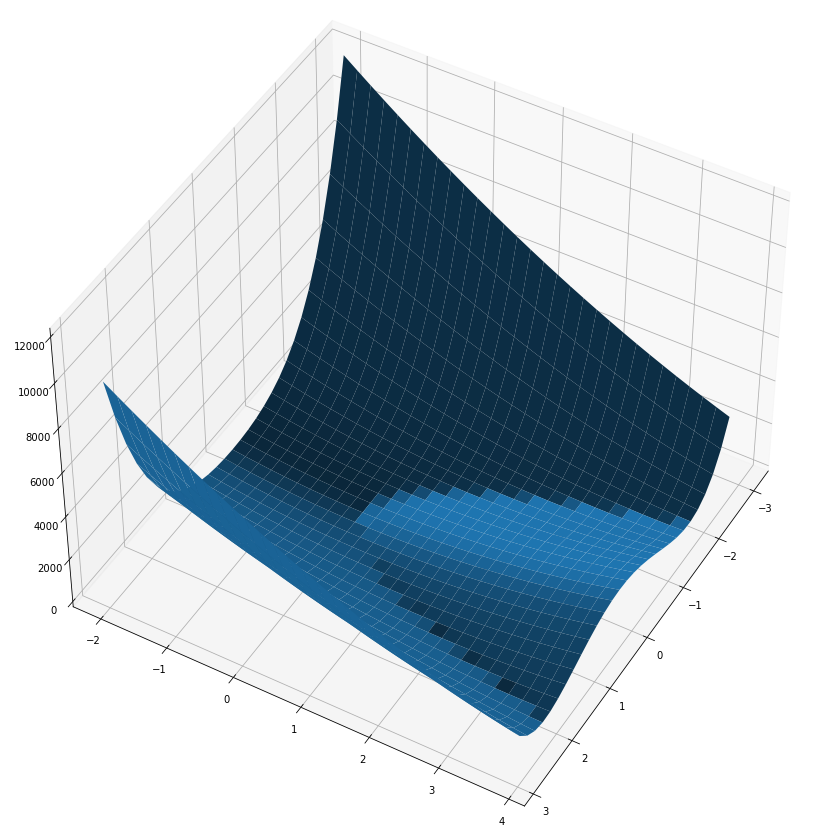

In [304]:
import matplotlib.pyplot as plt
graph = plt.figure(figsize=[25, 15])
ax = graph.gca(projection='3d')
ax.view_init(45, 30)
x1 = np.arange(-3, 3, 0.2)
x2 = np.arange(-2, 4, 0.2)
x1, x2 = np.meshgrid(x1, x2)
y = func_rosen(np.array([x1,x2]))
surf = ax.plot_surface(x1, x2, y)
plt.show()

Если внимательно посмотреть на график, можно увидеть долину параболической формы, о которой мы говорили ранее.

Теперь, когда нам доступно визуальное представление функции, давайте попробуем её оптимизировать. Начнём с простых методов.

Алгоритмом оптимизации, в котором вычисляются только значения функций, является [метод Пауэлла](https://en.wikipedia.org/wiki/Powell's_method). Чтобы использовать его, необходимо установить method = 'powell' в функции minim.

→ Мы выбрали данный метод потому, что он является самым простым из возможных в плане реализации и используемых вычислений. В следующем модуле мы комплексно рассмотрим все методы и поговорим о том, как выбрать нужный.

In [305]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='powell')
print(result_point.x)

[1. 1. 1. 1. 1.]


Итак, мы нашли точку минимума одним из методов. Теперь давайте используем для этого другой алгоритм.

Допустим, у нас есть некоторая точка  в пятимерном пространстве. Найдём ближайшую к ней точку минимума функции Розенброка, используя алгоритм [метода Нелдера — Мида](https://ru.wikipedia.org/wiki/%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%9D%D0%B5%D0%BB%D0%B4%D0%B5%D1%80%D0%B0_%E2%80%94_%D0%9C%D0%B8%D0%B4%D0%B0) (также его называют **симплекс-методом**):

In [306]:
from scipy.optimize import minimize
x1 = np.array([2.4, 1.5, 2.1, 0.7, 1.1])
result_point = minimize(func_rosen, x1, method='nelder-mead')
print(result_point.x)

[1.02760651 1.05589639 1.11509457 1.2440091  1.54862169]


→ Симплекс-метод является стандартным методом *линейного программирования*  для решения задачи оптимизации, в которой есть функция и несколько ограничений, выраженных в виде неравенств. Неравенства определяют область в форме многоугольника, в одной из вершин которого обычно находится решение. Симплекс-метод представляет собой систематическую процедуру проверки вершин как возможных решений.

### Задание 4.5

Оптимизируйте функцию Розенброка с помощью уже известного вам метода наименьших квадратов с использованием той же точки, которая фигурировала в наших решениях до этого.

Для реализации этого алгоритма используется функция least_squares.

→ Мы используем этот метод, так как он хорошо подходит для задач безусловной оптимизации и считается методом первого выбора, если необходимо оптимизировать функцию, для которой нет ограничений.

In [307]:
from scipy.optimize import least_squares

res =  least_squares(func_rosen, x1)
print((res.x).round(3))

[0.939 0.882 0.776 0.603 0.361]


# 5. Условные экстремумы. Метод Лагранжа

✍ Мы узнали, как в целом формулируется задача оптимизации и из каких элементов она состоит. Теперь настало время познакомиться с наиболее популярными алгоритмами, которые используются для оптимизации функций. Первым будет метод, который подходит для решения задачи условной оптимизации, — метод Лагранжа.

Представим, что мы хотим решить задачу классификации и столкнулись с довольно частым случаем, когда наши данные являются линейно неразделимыми, то есть объекты нельзя разделить на классы прямой или гиперплоскостью. Это может выглядеть следующим образом:

![](https://lms.skillfactory.ru/assets/courseware/v1/a19c1279faeb53e4ef7cc2ab351926ec/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_5_1.png)

Как видно по данному графику, точки нельзя явным образом разделить на две группы, а вот на графике ниже такое возможно:

![](https://lms.skillfactory.ru/assets/courseware/v1/112b513e17f97dbab9244cf8a2fea74c/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_5_2.png)

Если для исследуемых данных не существует прямой или плоскости, с помощью которых можно поделить выборку на два класса, хорошим методом для решения задачи считается **метод опорных векторов (SVM)**. Алгоритм SVM подбирает гиперплоскость таким образом, чтобы выполнялось два условия:

* минимальная ошибка разделения на классы;
* максимально возможное расстояние от разделяющей гиперплоскости до ближайшей точки.

Иллюстрацию этой идеи можно увидеть ниже:

![](https://lms.skillfactory.ru/assets/courseware/v1/f6c83f5f2f83eef2be3aa2a14779c49c/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_5_3.png)

Так как данные обычно не так хорошо разделимы, как изображено выше, используется перенос данных в пространство такой размерности, где они становятся разделимыми:

![](https://lms.skillfactory.ru/assets/courseware/v1/9367995bf31a697068c8c87796b62166/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_5_4.png)

Здесь задачей оптимизации является минимизация ошибки разделения выборки, и именно эта задача как раз и может быть решена методом Лагранжа.

> **Метод множителей** Лагранжа является стратегией обнаружения минимумов и максимумов дифференцируемых функций (то есть таких функций, для которых можно найти производную) при условии ограничений равенства на его независимые переменные.

В случае безусловной оптимизации мы решали задачи, приравнивая к нулю производную функции одной переменной или все частные производные в многомерном случае. Далее мы находили экстремумы и выбирали минимум или максимум. В случае с поиском решения задачи условной оптимизации алгоритм будет похож, но в него будут внесены некоторые коррективы.

Давайте перейдём к практике и рассмотрим, как формулируется и решается задача оптимизации, в которой есть ограничения.

Пусть у нас есть функция $f(x)$, для которой мы хотим найти минимум при ограничении $\phi_i (x) = 0$. Можно записать это следующим образом:

$min_{\phi_i (x) = 0} \ f(x)$

Чтобы решить такую задачу, в первую очередь записываем функцию Лагранжа, т. е. объединяем с её помощью саму целевую функцию и функцию ограничений внутри одного выражения:

$$L(x, \lambda) = f(x) + \sum \lambda_i \phi_i (x)$$

> Дополнительные переменные $\lambda_i$, которые появляются при формулировании функции Лагранжа, называются **множителями Лагранжа**.

По сути, с помощью создания такой новой функции мы свели задачу к уже известной нам задаче безусловной оптимизации. Вы умеете её решать и можете догадаться, что далее вычисляются частные производные построенной функции Лагранжа по $x$ и дополнительной переменной $\lambda$. Затем находятся точки, в которых производные равны нулю, и точки экстремума.

Разберём алгоритм применения метода множителей Лагранжа на конкретном примере. Представим, что мы хотим максимизировать следующую функцию:

$f(x,y) = 2x + y$

Однако мы хотим не просто найти её максимально возможное значение (на самом деле оно равно бесконечности, если на  и  не стоит никаких ограничений), а сделать это при условии выполнения следующего равенства:

$x^2+y^2=1$

Если представить условие визуально, оно выглядит как окружность на координатной плоскости:

![](https://lms.skillfactory.ru/assets/courseware/v1/2fc89194d63d363dfcf82dbdde28a38e/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_5_5.png)

Мы хотим найти такую точку этой окружности, для которой значение функции $f(x,y) = 2x + y$ будет максимально возможным. Или, если переформулировать задачу, приведя её к задаче минимизации, мы ищем точку окружности, для которой значение функции $f(x,y) = -2x - y$ будет наименьшим. Ранее мы говорили, что обычно все задачи оптимизации сводятся к поиску минимума. Однако важно помнить, что ровно так же мы можем решать и задачи поиска максимума. Данную задачу решим в её первозданном виде. Именно для метода Лагранжа оба подхода (и поиск максимума, и поиск минимума) являются абсолютно симметричными.

Для того чтобы решить данную задачу, нам необходимо написать функцию Лагранжа. В общем виде она выглядит следующим образом:

![](https://lms.skillfactory.ru/assets/courseware/v1/f699fdf1383c6ec84ac309dd95c67b2a/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_5_6.png)

Здесь $f(x,y)$ — это сама функция, $g(x,y)$ — функция ограничений, $\lambda$ — множитель Лагранжа.

В данном случае все эти элементы функции Лагранжа принимают следующий вид:

![](https://lms.skillfactory.ru/assets/courseware/v1/c9892623d21fe919b1d13d1e53d1d77a/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_5_7.png)

Сама функция записывается следующим образом:

![](https://lms.skillfactory.ru/assets/courseware/v1/930f34f167abdeff0d3ce859931026fa/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_5_8.png)

Первым делом мы должны найти частные производные по каждой переменной:

$L'_x = (2x + y - \lambda x^2 - \lambda y^2 + \lambda)'_x = 2 - 2 \lambda x$

$L'_y = (2x + y - \lambda x^2 - \lambda y^2 + \lambda)'_y = 1 - 2 \lambda y$

$L'_{\lambda} = (2x + y - \lambda x^2 - \lambda y^2 + \lambda)'_{\lambda} = -x^2 - y^2 + 1$

Теперь приравняем их к нулю и решим систему уравнений:

$\left\{\begin{matrix} 2 - 2 \lambda x = 0 \\ 1 - 2 \lambda y = 0 \\ -x^2 - y^2 + 1 = 0\end{matrix}\right.$

$x = \frac{2}{2 \lambda} = \frac{1}{\lambda}, \ y = \frac{1}{2 \lambda}$

$-(\frac{1}{\lambda})^2 - (\frac{1}{2 \lambda})^2 + 1 = 0$

$- \frac{1}{\lambda^2} - \frac{1}{4 \lambda^2} + 1 = 0$

$\lambda_1 = \frac{\sqrt{5}}{2}, \ \lambda_2 = - \frac{\sqrt{5}}{2}$

$x_1 = \frac{2}{\sqrt{5}}, \ x_2 = - \frac{2}{\sqrt{5}}$

$y_1 = \frac{1}{\sqrt{5}}, \ y_2 = - \frac{1}{\sqrt{5}}$



Для определения точек максимума и минимума найдём значения целевой функции в найденных точках:

$(\frac{2}{\sqrt{5}}; \frac{1}{\sqrt{5}}): 2x + y = \frac{4}{\sqrt{5}} + \frac{1}{\sqrt{5}} = \frac{5}{\sqrt{5}} = \sqrt{5} \approx 2.24$

$(- \frac{2}{\sqrt{5}}; - \frac{1}{\sqrt{5}}): 2x + y =- \frac{4}{\sqrt{5}} - \frac{1}{\sqrt{5}} = - \frac{5}{\sqrt{5}} = - \sqrt{5} \approx -2.24$

Получаем, что в первой точке — максимум, а во второй — минимум.

### Задание 5.1

Найдите экстремумы функции  на множестве, заданном уравнением .

В качестве ответа впишите значения функции в точках максимума и минимума.

In [308]:
x, y, f, l = symbols('x, y, f, l')

f = 4*x + 3*y
c = 1
g = x**2 + y**2 - c


L = f + l*g
print('L = ', L)

diff_L_x = diff(L, x)
diff_L_y = diff(L, y)
diff_L_l = diff(L, l)
print("L'(x) = ", diff(L, x))
print("L'(y) = ", diff(L, y))
print("L'(l) = ", diff(L, l))

extr = solve([diff_L_x, diff_L_y, diff_L_l], [x, y, l])

print('Точки экстремумов (x, y, l): ', extr)

print('Значение функции в первой точке: ', f.subs([(x, extr[0][0]), (y, extr[0][1])]))

print('Значение функции во второй точке: ', f.subs([(x, extr[1][0]), (y, extr[1][1])]))

L =  l*(x**2 + y**2 - 1) + 4*x + 3*y
L'(x) =  2*l*x + 4
L'(y) =  2*l*y + 3
L'(l) =  x**2 + y**2 - 1
Точки экстремумов (x, y, l):  [(-4/5, -3/5, 5/2), (4/5, 3/5, -5/2)]
Значение функции в первой точке:  -5
Значение функции во второй точке:  5


Давайте разберём два примера, в которых необходимо не просто решить задачу оптимизации с помощью метода Лагранжа, а сначала перевести какую-то реальную задачу на язык оптимизации.

**Пример № 1**

*Длина забора — 20 метров. Какова максимальная площадь прямоугольного участка, который можно огородить?*

Сформулируем задачу оптимизации. Пусть мы будем огораживать прямоугольник со сторонами $x_1$ и $x_2$. Нам необходимо максимизировать площадь при периметре, равном 20 м.

Получается, что мы должны максимизировать функцию $f(x_1, x_2) = x_1 * x_2$ при условии $2x_1 + 2x_2 = 20$.

Переформулируем задачу максимизации в задачу минимизации и упростим наше ограничение:

$min_{x_1 + x_2 - 10 = 0} - x_1 x_2$

Запишем функцию Лагранжа:

$L(x_1, x_2, \lambda_1) = - x_1 x_2 + \lambda_1(x_1 + x_2 - 10)$



Найдём частные производные:

$L'_{x_{1}} = -x_2 + \lambda_1$

$L'_{x_{2}} = -x_1 + \lambda_1$

$L'_{\lambda} = x_1 + x_2 -10$

Приравняем их к нулю:

$\left\{\begin{matrix} -x_2 + \lambda_1 = 0 \\ -x_1 + \lambda_1 = 0 \\ x_1 + x_2 = 10\end{matrix}\right.$

У нас получилась система линейных уравнений, которую мы можем решить, например, с помощью метода Гаусса, который вы изучали в модуле по линейной алгебре. Это отличная возможность увидеть его применение в оптимизации.

![](https://lms.skillfactory.ru/assets/courseware/v1/f773aa178296b3cc21f17ddd533ebc08/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_5_9.png)

![](https://lms.skillfactory.ru/assets/courseware/v1/5c31bc8c5a761cfccdf44d908f8717d1/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_5_10.png)

Получаем искомые $x_1$ и $x_2$, т. е. наибольшая площадь будет у квадрата 5 × 5. Таким образом, максимальная площадь, которую можно огородить, равна $25 \ м^2$.

**Пример № 2**

*Вы управляете фабрикой, производящей изделия, в качестве сырья для которых требуется сталь. Ваши затраты — это преимущественно человеческий труд, который вы оплачиваете из расчёта 20 долларов в час для каждого рабочего, и сама сталь, которая стоит 170 долларов за тонну. Предположим, что функция $R$, прогнозирующая ваш доход, приблизительно моделируется следующим уравнением:*

$R(h,s) = 200 h^{\frac{2}{3}} s^{\frac{1}{3}}$

*В данном уравнении за $h$ обозначается число человеко-часов, а за $s$ — тонны стали.*

*Необходимо найти максимально возможный доход, если на затраты мы можем взять из бюджета только 20 000 долларов.*

Учитывая наши ограничения на оплату труда рабочих и закупку стали, можем записать функцию ограничений:

$20 h - 170 s = 20000$

У нас есть целевая функция и функция ограничений — можно переходить к составлению функции Лагранжа:

$L(h,s, \lambda) = 200 h^{\frac{2}{3}} s^{\frac{1}{3}} - \lambda (20 h + 170 s - 20000)$

Найдём все частные производные:

$L'_h = \frac{\partial}{\partial h} (200 h^{\frac{2}{3}} s^{\frac{1}{3}} - \lambda (20 h + 170 s - 20000)) = 200 \cdot \frac{2}{3} h^{- \frac{1}{3}} s^{\frac{1}{3}} - 20 \lambda$

$L'_s = \frac{\partial}{\partial s} (200 h^{\frac{2}{3}} s^{\frac{1}{3}} - \lambda (20 h + 170 s - 20000)) = 200 \cdot \frac{1}{3} h^{\frac{2}{3}} s^{- \frac{2}{3}} - 170 \lambda$

$L'_{\lambda} = \frac{\partial}{\partial \lambda} (200 h^{\frac{2}{3}} s^{\frac{1}{3}} - \lambda (20 h + 170 s - 20000)) = -20 h - 170 s + 20000$

Далее приравниваем все частные производные к нулю и решаем следующую систему уравнений:

$\left\{\begin{matrix} 200 \cdot \frac{2}{3} h^{- \frac{1}{3}} s^{\frac{1}{3}} - 20 \lambda = 0 \\ 200 \cdot \frac{1}{3} h^{\frac{2}{3}} s^{- \frac{2}{3}} - 170 \lambda = 0 \\ 20 h + 170 s = 20000\end{matrix}\right.$



→ Разумеется, при решении  прикладных задач «красивые» ответы обычно не получаются, поэтому проще решать такие системы с помощью Python или любым удобным для вас способом (чуть далее мы рассмотрим полностью программное решение).

Получаем следующие ответы:

$h = \frac{2000}{3} \approx 666.667$

$s = \frac{2000}{51} \approx 39.2157$

$\lambda = \sqrt[3]{\frac{8000}{459}} \approx 2.593$

Если бы работники выполняли свои обязанности дробное количество часов или если бы мы покупали сталь килограммами, то, в целом, полученные значения уже можно было бы использовать для вычисления итоговой прибыли. Но иногда мы обязаны округлять значения — так и поступим:

$R(667,39) =200(667)^{\frac{2}{3}} (39)^{\frac{1}{3}} \approx \$ 51.777$

Таким образом, мы получили максимально возможную прибыль при условии обозначенных затрат.

Итак, мы рассмотрели алгоритм решения задачи оптимизации с помощью метода Лагранжа. Теперь вы можете использовать его для различных задач, которые могут возникнуть в вашей работе.

**Пример № 3**

*У нас есть два станка для производства пластиковых упаковок. Станки разных моделей, поэтому при их использовании получаются разные издержки, зависящие от произведённых упаковок и выражаемые следующими функциями:*

$g(a) = 3a^2 + a$

$g(b) = 4b + 5b^2$

*Здесь $a$ — это количество упаковок, произведённых на первом станке, а $b$ — количество упаковок, произведённых на втором станке.*

*Нам заказали 200 упаковок. Мы хотим выполнить заказ, минимизировав расходы на изготовление товаров. Чтобы узнать, как мы можем сэкономить, необходимо решить задачу оптимизации.*

Составим  нашу целевую функцию:

$f(a,b) = 3a^2 + a + 4b + 5b^2$

Запишем функцию ограничений:

$\phi(a,b) = a + b - 200 = 0$

Составим функцию Лагранжа:

$L(a,b, \lambda) = 3a^2 + a + 4b + 5b^2+ \lambda \cdot (a + b - 200)$

Найдём первые производные и приравним их к нулю:

$L'_a = 6a + 1 + \lambda = 0$

$L'_b = 4 + 10b + \lambda = 0$

$L'_{\lambda} = a + b - 200 = 0$

Найдём решения системы:

$a = 125.1875$

$b = 74.8125$

$\lambda = -752.125$

Теперь повторим то же самое с помощью Python.

In [309]:
from sympy import *
a,b,w=symbols(' a b w' )
g = 3*a**2 + a + 4*b + 5*b**2
print('Целевая функция для аргументов a и b :\n f = ', g)
q = a + b - 200
print('Функция ограничений: ', q,'= 0')
f = 3*a**2 + a + 4*b + 5*b**2 + w*(a + b - 200)
print('Функция Лагранжа :\n ',f)
fa = f.diff(a)
print('df/da =',fa,'= 0')
fb = f.diff(b)
print('df/db =',fb,'= 0')
fw = f.diff(w)
print('df/dw =',fw,'= 0')
sols = solve([fa,fb,fw],a,b,w)
print('Стационарная точка M(x,y):\n',float(sols[a]),',',float(sols[b]))

Целевая функция для аргументов a и b :
 f =  3*a**2 + a + 5*b**2 + 4*b
Функция ограничений:  a + b - 200 = 0
Функция Лагранжа :
  3*a**2 + a + 5*b**2 + 4*b + w*(a + b - 200)
df/da = 6*a + w + 1 = 0
df/db = 10*b + w + 4 = 0
df/dw = a + b - 200 = 0
Стационарная точка M(x,y):
 125.1875 , 74.8125


Получился тот же результат, что и при решении «вручную».

Также отметим, что мы говорим здесь о целых предметах (упаковках), поэтому при использовании этого решения в реальной жизни мы округлили бы значения до ближайших целых.

### Задание 5.3

Представьте, что вы решаете задачу классификации методом опорных векторов и хотите оценить расстояние от объекта до разделяющей прямой с помощью метода Лагранжа. Если объект имеет координаты $(2;1)$, а прямая задана уравнением $x+y=1$, то каким будет квадрат расстояния от этого объекта до прямой?

In [310]:
from sympy import *
x,y,w=symbols(' x y w' )
g = ((x-2)**2+(y-1)**2)**(0.5)
q = x + y - 1
f = ((x-2)**2+(y-1)**2)**(0.5) + w*(x + y - 1)
fx = f.diff(x)
fy = f.diff(y)
fw = f.diff(w)
sols = solve([fx,fy,fw],x,y,w)
(float(sols[0][0]) - 2)**2 + (float(sols[0][1]) - 1)**2

2.0

### Задание 5.4

Прямоугольный параллелепипед имеет объём $1м^3$. Чему равна минимальная площадь его поверхности?

In [311]:
a, b ,c, w = symbols('a b c w')
f =2*a*b + 2*b*c + 2*a*c
q = a * b * c - 1
L = f - w*q

fa = L.diff(a)
fb = L.diff(b)
fc = L.diff(c)
fw = L.diff(w)

sols = solve([fa,fb,fc,fw],a,b,c,w)
sols[0][:3]
f.subs([(a, sols[0][0]), (b, sols[0][1]), (c, sols[0][2])])

6

Мы разобрали задачи, в которых ограничения выглядели, как равенства. Но бывают и исключительные случаи, в которых ограничения заданы в виде неравенств. Что делать в такой ситуации?

Ограничения в виде неравенства можно свести к ограничениям равенства с помощью дополнительной переменной $\widetilde{x}_i$.

$\phi_i (x) \leq 0 \Leftrightarrow \phi_i (x) + \widetilde{x}^2_i = 0$

Записанное выше ограничение стоит понимать следующим образом: если мы хотим, чтобы функция гарантированно была неположительной, то она должна давать ноль в сумме с каким-то заведомо неотрицательным значением.

Рассмотрим решение задачи с таким ограничением на примере ↓

*Длина забора — 20 метров. Какова максимальная площадь прямоугольного участка, который можно огородить? Хотя бы одна из сторон прямоугольника должна быть не меньше 6.*

Сформулируем задачу как задачу оптимизации:

$\displaystyle \max_{ 2x_1 + 2x_2 = 20 \  \ x_1 \geq 6} \ x_1 x_2$

Сведём задачу к минимизации с ограничениями–равенствами, переформулировав второе ограничение:

$\displaystyle \min_{ x_1 + x_2 -10 = 0 \ \ \ -x_1 + 6 + \widetilde{x}^2_1 = 0} \ - x_1 x_2$

Построим функцию Лагранжа:

$L(x_1, x_2, \widetilde{x}_1, \lambda_1, \lambda_2) = -x_1 x_2 + \lambda_1 (x_1 + x_2 - 10) + \lambda_2 (-x_1 + 6 + \widetilde{x}^2_1)$

Найдём все частные производные:

![](https://lms.skillfactory.ru/assets/courseware/v1/49987ff83fcfd5fa0bf5c2dae9fcb45e/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_5_11.png)

Приравняем их к нулю:

![](https://lms.skillfactory.ru/assets/courseware/v1/c2e318fcbc4e6c60629cdcfacdef4ef5/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_5_12.png)

В этой системе мы не можем найти все переменные, однако можем решить её отчасти (найти $x_1$ и $x_2$).

Это можно сделать с помощью следующего кода (для удобства переменные обозначены другими буквами):

In [312]:
from sympy import *
a,b,c,x,y,w=symbols('a b c x y w' )
fa = -x+a+b
fb=-y+a
fc=2*b*c
fx=x+y-10
fy = -x + 6 + c
sols = solve([fa,fb,fc,fx,fy],a,b,c,x,y,w)
print(sols[0])

(4, 2, 0, 6, 4, w)


Получаем, что значения $x$ и $y$ равны 6 и 4 соответственно, а значит максимальная площадь равна 24.

Итак, мы рассмотрели разные применения метода Лагранжа и теперь можем использовать его для решения задач с любыми ограничениями.

# 6. Градиент и антиградиент


✍ В предыдущих юнитах мы научились дифференцировать различные функции, а также реализовывать простейшие алгоритмы оптимизации. Теперь пришло время подойти к самому известному алгоритму в сфере анализа данных — **градиентному спуску**. Он применяется почти в каждой модели машинного обучения, а также его используют в глубинном обучении для нейронных сетей в модификации, которую называют **обратным распространением ошибки**.

В следующем юните мы подробно разберём принцип работы данного алгоритма, а пока нам необходимо набраться терпения и создать фундамент для освоения этого метода. В первую очередь нужно разобраться с понятием **градиента** — центральным понятием в алгоритме градиентного спуска.

Давайте представим, что у нас есть функция, которая приближённо прогнозирует прибыль:

$f(x,y) = x^2 y + 4y + yx$

Если мы захотим максимизировать доход, то, скорее всего, решим сформулировать задачу оптимизации, а затем перейдём к вычислению частных производных. Вы уже прекрасно умеете их искать — давайте убедимся в этом ↓

### Задание 6.1

Найдите частные производные для функции $f(x,y) = x^2 y + 4y + yx$

Производная по $x$:

In [313]:
f, x, y = symbols('f x y')
f = x**2*y + 4*y + y*x

f.diff(x,1)

2*x*y + y

Производная по $y$:

In [314]:
f.diff(y)

x**2 + x + 4

Отлично — вы вспомнили, как вычислять частные производные. Теперь как будто бы надо научиться вычислять ещё и градиент. Но вы только что сделали это, сами того не заметив. Как же так?

Градиент функции $f$, обозначаемый как $\nabla f$, представляет собой совокупность всех её частных производных, представленных  в виде вектора:

![](https://lms.skillfactory.ru/assets/courseware/v1/8d1da4a82d256f2eb0c560c0069b531f/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_6_1.png)

Таким образом, вы можете найти каждую производную отдельно, соединить все производные вместе и получить градиент.

Заметьте, что **$\nabla f$ — векторнозначная функция**. В данном примере эта функция ставит в соответствие двум значениям из одного множества два значения из другого. Из этого следует, что эту функцию очень удобно визуализировать с помощью **векторного поля**, которое представляет собой множество векторов градиента, проведённых из всех возможных точек:

![](https://lms.skillfactory.ru/assets/courseware/v1/c5dcbd13794a21bc245d84771abb536c/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_6_3.png)

Для того чтобы получить такое поле, в каждой точке проводится вектор, который образуется, если подставить эту точку в вектор градиента. Это векторное поле ещё часто называют **градиентным полем функции**.

Разумеется, градиент можно найти не только для функции, которая зависит от двух аргументов. Попробуйте сделать это для функции трёх переменных ↓

### Задание 6.3

Найдите вектор градиента для функции $f(x,y,z) = x - xy + z^2$:

In [315]:
f, x, y, z =symbols('f x y z')
f = x - x*y + z**2

np.array([
    (f.diff(x)),
    (f.diff(y)),
    (f.diff(z)),
])


array([1 - y, -x, 2*z], dtype=object)

Отлично — мы научились находить градиент, но зачем он, собственно, нужен и чем так интересен?

Представим функцию в виде холмистой местности. Пусть мы стоим в какой-то точке этой местности ($x_1$, $y_1$). Если мы будем менять своё положение по оси $x$ или по оси $y$ в положительную сторону, то будем подниматься на холм. Но обычно при движении мы меняем координаты положения не по одному измерению, а все разом, то есть меняем положение в пространстве по градиенту. Именно здесь важно осознать самое главное свойство градиента, которое и сделало его столь популярным у аналитиков и специалистов по машинному обучению, — **градиент определяет направление наискорейшего роста функции**.

Давайте ещё раз обдумаем это утверждение. Стоит вспомнить определение производной, которое мы вводили в предыдущем модуле: производная определяет скорость роста функции при изменении какого-либо аргумента. В данном случае мы изменяем все аргументы разом, а значит ускорение придаётся со всех сторон.

Если мы заменим все координаты градиента на значения с противоположным знаком, то получим **антиградиент**, который является **направлением наискорейшего убывания функции**.

Проще представить это визуально. Допустим, график нашей функции выглядит, как на изображении ниже, то есть у него есть два максимума, которые визуально представлены двумя холмами.




![](https://lms.skillfactory.ru/assets/courseware/v1/18f51240da591ce1a84f25b56b37e060/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_6_7.png)

Тогда градиентное поле будет выглядеть следующим образом:

![](https://lms.skillfactory.ru/assets/courseware/v1/62f19e0850af68c5b5f1cd0907487584/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_6_8.png)

→ Внимательно присмотритесь к нему, и вы увидите, что, в какую бы точку плоскости мы ни попали, там оказывается стрелка, которая указывает в сторону ближайшего холма.

Если очень сильно упростить, именно так устроен алгоритм градиентного спуска, но подробнее об этом мы поговорим в следующем юните.

Чтобы понять ещё одно свойство градиента, вспомним о том, что также градиентом называют плавный переход от одного цвета к другому. Это выглядит следующим образом:

![](image.png)

Перекладывая понимание градиента на изменение оттенка, а не значения функции (хотя на самом деле можно сказать, что изменяется значение функции, выражающей оттенок), можно утверждать, что на данном рисунке:

* Градиент — это стрелка, задающая направление заливки.
* Линии, вдоль которых яркость одинаковая, будут ортогональны градиенту. Назовём их **линиями уровня яркости**.
* Двигаясь вдоль градиента, мы максимально скоро выйдем на самое яркое место.

Данный пример нужен нам для того, чтобы перейти к пониманию **линий уровня** функции. На изображении выше линия уровня — это линия с одинаковым цветом. По аналогии у функции могут быть линии, в каждой точке которых функция принимает одно и то же значение. Например, пусть у нас есть следующая функция:

![](https://lms.skillfactory.ru/assets/courseware/v1/3c260a7791358cc1057115d0668ec628/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_6_10.png)

Линии уровня для неё (если спроецировать их в нижнюю плоскость) будут выглядеть следующим образом, и, как и в примере с изменением заливки, векторы градиентов будут перпендикулярны линиям уровня:

![](https://lms.skillfactory.ru/assets/courseware/v1/fafe2b042770da62f82bd57be96be0df/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_6_11.png)

С линиями уровня вы уже встречались, когда видели топографические карты:

![](https://lms.skillfactory.ru/assets/courseware/v1/086cc6cc8d6d48a515621b83f57d25b4/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_6_12.png)

На них линиями отмечена местность с одинаковым значением высоты над уровнем моря. Причём, заметьте, что в каких-то местах линии ближе друг к другу, а в каких-то — дальше. Это происходит потому, что в каких-то местах высота увеличивается быстро (вероятно, там холмы), а в каких-то — медленно (равнины).Разумеется, если мы хотим как можно быстрее попасть повыше, нам необходимо двигаться в тех местах, где линии уровня близки друг к другу.

Так и у функций: когда линии уровня близки друг к другу, мы понимаем, что значение функции там меняется быстро, а значит там наибольший градиент.

Итак, мы разобрались с понятием градиента функции. Для закрепления знаний пройдём ещё раз полный путь его вычисления ↓

Пусть у нас есть функция $f(x,y) = x^2 + y^2$, и мы хотим найти её градиент в точках $M(0;0), \ N(1;-1), \ P(1;1)$.

Вычислим частные производные:

$\frac{\partial f}{\partial x} = 2x, \ \frac{\partial f}{\partial y} = 2y$

Составим вектор градиента:

$\nabla f = \left ( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right ) = (2x,2y)$

Либо, кроме уже известного обозначения, можно использовать такое:

$\overrightarrow{grad} f = \left ( \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right ) = (2x,2y)$

Теперь подставим интересующие нас точки:

$\overrightarrow{grad} f|_M = (2x,2y)|_{x=0,y=0} = (0,0)$

$\overrightarrow{grad} f|_N = (2x,2y)|_{x=1,y=-1} = (2,-2)$

$\overrightarrow{grad} f|_P = (2x,2y)|_{x=1,y=1} = (2,2)$

Получаем, что в точке $N$ градиент равен $(2,-2)$, то есть при увеличении $x$ функция будет возрастать, а при увеличении $y$ — убывать. В точке $P$ значение градиента равно $(2,2)$ — это значит, что в окрестности $P$ сумма квадратов возрастает по обеим переменным. В точке $M$ градиент нулевой, то есть все частные производные равны нулю, а значит возможно, что в этой точке находится экстремум.

## ВЫЧИСЛЕНИЕ ГРАДИЕНТА ДЛЯ ЧИСЛОВЫХ ВЕКТОРОВ В PYTHON

Для вычисления градиента в Python есть специальная функция — gradient() из библиотеки NumPy. Градиент вычисляется на заданной $N$-мерной сетке с шагом, который можно задать вручную.

Такой градиент немного отличается от того, который мы обсудили ранее, поскольку это градиент для численных значений, а не для функций (хотя он обозначается так же и аналогичен по смыслу). Однако он тоже используется в DS, особенно в задачах компьютерного зрения.

Например, пусть у нас есть чёрно-белая фотография. Тогда вектор градиента может быть вычислен для каждого пикселя изображения. Это просто мера изменения значений пикселей вдоль направлений $x$ и $y$ вокруг каждого пикселя. То есть производная для функции характеризует скорость её изменения, а производная для численного вектора характеризует, как быстро меняются его значения — таким образом, смысл один и тот же.

Допустим, у нас есть такой фрагмент фотографии:

![](https://lms.skillfactory.ru/assets/courseware/v1/3b6ca80db274cc1d4eeb48c5a929ea87/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_6_14.png)

Это изображение в оттенках серого, поэтому значения пикселей варьируются от 0 до 255 (0 — чёрный, 255 — белый). Значения пикселей слева и справа от нашего пикселя отмечены на изображении: 56 и 94. Мы просто вычитаем из правого значения левое и делаем вывод, что скорость изменения в направлении $x$ равна 38 ($94-56=38$).

**Примечание**. На данном фрагменте фотографии пиксели из тёмных становятся светлыми при перемещении слева направо. Если бы мы посмотрели на одно и то же место в другом направлении (справа налево), то получили бы отрицательное значение для изменения. Вы можете вычислить градиент, вычтя левое значение из правого или правое из левого — просто нужно вычислять градиенты одинаково на всём изображении.

Мы можем сделать то же самое и для пикселей выше и ниже, чтобы получить изменение в направлении $y$.

Такая возможность находить градиенты для изображения крайне важна для решения задач компьютерного зрения, так как позволяет обнаруживать границы разных объектов. Это помогает решать задачи сегментации, распознавания, классификации и многие другие.

Например, на изображении ниже слева вы видите изначальное изображение кошки. В центре находится градиентное изображение, в котором в каждом пикселе рассчитаны градиенты в направлении $x$, измеряющие горизонтальное изменение интенсивности. Справа можно видеть градиентное изображение в направлении $y$, измеряющее вертикальное изменение интенсивности. Серые пиксели имеют небольшой градиент, чёрные или белые пиксели — большой. В результате стали очень хорошо видны границы — это очень полезно для нахождения контуров объектов.

![](https://lms.skillfactory.ru/assets/courseware/v1/47133db32ec0b67677f84e575cb57ca0/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_6_15.png)

Если вы будете работать со свёрточными нейронными сетями для обработки изображений, то неизбежно столкнётесь с необходимостью находить такие контуры и будете использовать для этого [фильтр Собеля](https://habr.com/ru/post/114452/) — он как раз основан на принципе нахождения таких градиентов.

Итак, перейдём к примеру вычислений. Для работы с градиентом импортируем хорошо известную нам библиотеку NumPy:

In [316]:
import numpy as np


Зададим массив, для которого хотим найти градиент, и вычислим его:



In [317]:
f = np.array([3, 7, 14, 23, 36, 47], dtype=np.float)
 
np.gradient(f)

# array([ 4. ,  5.5,  8. , 11. , 12. , 11. ])

C:\Users\Home\AppData\Local\Temp/ipykernel_10152/4090211407.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  f = np.array([3, 7, 14, 23, 36, 47], dtype=np.float)


array([ 4. ,  5.5,  8. , 11. , 12. , 11. ])

Если специально не определять аргумент varargs, то его значение равно 1, так что на границах вектора мы получаем обычную разность для соседних элементов массива:

In [318]:
print(f[1] - f[0], f[-1] - f[-2])

# (4.0, 11.0)

4.0 11.0


А вот внутри вектора для каждого элемента мы считаем разность его соседних значений, но уже поделённую на 2, то есть, по сути, среднее арифметическое для значений:

In [319]:
(f[2] - f[0])/2 # 5.5
(f[3] - f[1])/2 # 8.0
(f[4] - f[2])/2 # 11.0
(f[5] - f[3])/2 # 12.0

12.0

Шаг можно варьировать. При его изменении вычисления реализуются так же, но деление происходит на величину обычного шага у края и удвоенную величину шага для элементов внутри вектора:

In [320]:
np.gradient(f, 2)

# array([2.  , 2.75, 4.  , 5.5 , 6.  , 5.5 ])

for i in range(1, len(f) - 1):
    print((f[i + 1] - f[i - 1])/(2*2))
#2.75
#4.0
#5.5
#6.0

2.75
4.0
5.5
6.0


### Задание 6.5

$f(a,b) = (5 − a − 2b)^2$

1. Вычислите $\overrightarrow{grad} f|_{M(1,1)}$:

In [321]:
f, a, b = symbols('f a b')
f = (5 - a - 2*b)**2
print("f'(a) = ", f.diff(a))
print("f'(a) = ", f.diff(b))
print('Grad_f:')
print(f.diff(a).subs([(a, 1), (b, 1)]))
print(f.diff(b).subs([(a, 1), (b, 1)]))




f'(a) =  2*a + 4*b - 10
f'(a) =  4*a + 8*b - 20
Grad_f:
-4
-8


2. Сколько решений имеет СЛАУ?

In [322]:
eq1 = Eq(f.diff(a), 0)
eq2 = Eq(f.diff(b), 0)
print(solve([eq1, eq2], [a,b]))

{a: 5 - 2*b}


### Задание 6.6

$L^2$-loss функция имеет вид $L = (2.1 − w_0 − w_1)^2 +(2.9 − w_0 − 3w_1)^2 +(4.1 − w_0 − 5w_1)^2$.

1. Сколько решений имеет СЛАУ ?

In [323]:
L, w0, w1 = symbols('L w0 w1')
L = (2.1 - w0 - w1)**2 + (2.9 - w0 - 3*w1)**2 + (4.1 - w0 - 5*w1)**2
eq1 = Eq(L.diff(w0), 0)
eq2 = Eq(L.diff(w1), 0)
print(solve([eq1, eq2], [w0,w1]))

{w0: 1.53333333333333, w1: 0.500000000000000}


### Задание 6.7

Пусть дан одномерный массив ```f = np.array([8, 2, 8, 3, 5, 6, 5, 15])```.

Вычислите градиент массива , увеличив шаг сетки в семь раз, и укажите значение седьмого элемента массива получившихся градиентов .

In [324]:
f = np.array([8, 2, 8, 3, 5, 6, 5, 15])
np.gradient(f, 7)[7]

1.4285714285714286

# 7. Градиент и градиентный спуск

✍ В предыдущем юните мы познакомились с таким важным понятием математического анализа, как градиент. Теперь можно разбираться, как работает **алгоритм градиентного спуска**.

Попробуйте представить функцию $f(x,y)$, которая визуализируется в виде неоднородной, «холмистой» поверхности:

![](https://lms.skillfactory.ru/assets/courseware/v1/479402be12257a1f1a01d8269efd6f5b/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_7_1.png)

В предыдущем юните мы узнали, что градиент, вычисленный в любой точке, по сути, представляет собой направление самого крутого подъёма на таком ландшафте. Это может натолкнуть на идею о том, как мы могли бы максимизировать функцию: встать на случайную точку и столько раз, сколько сможем, сделать небольшой шаг в направлении градиента, чтобы двигаться в гору. Другими словами, мы будем пытаться подняться на самый высокий холм, двигаясь по самому крутому подъёму вверх в каждой точке.

Чтобы минимизировать функцию, можно следовать направлению антиградиента и таким образом двигаться в сторону самого крутого спуска, то есть в каждой точке находить направление самого крутого склона вниз и идти по нему.

Обдумайте эту идею, она должна быть интуитивно понятна: если мы стоим на на краю оврага и хотим спуститься вниз как можно быстрее (и если мы не боимся упасть), то будем пытаться спускаться по самым крутым склонам, а не идти долгим путём по более пологим.

Ровно так и работает алгоритм градиентного спуска. Он стартует с некоторой точки ландшафта и всё время двигается по самому крутому направлению вниз, то есть по антиградиенту.

Формально можно записать, что для того, чтобы попасть в следующую точку , необходимо перейти из начальной точки  на антиградиент, домноженный на некоторый коэффициент, который называется **шагом градиентного спуска** или **темпом обучения** — о нём мы поговорим немного позже.

$$x_1 = x_0 - \alpha \nabla f (x_0)$$



В более общем виде формула будет выглядеть следующим образом:

$$x_{n+1} = x_n - \alpha \nabla f (x_n)$$

Так, шаг за шагом, мы движемся в направлении антиградиента, пока не найдём локальный минимум. Этот процесс может занять тысячи итераций, поэтому мы, разумеется, обычно реализуем градиентный спуск с помощью компьютера.

Рассмотрим пример, чтобы лучше понять принцип работы градиентного спуска на конкретной функции — $f(x) = \frac{x^2 cos(x) - x}{10}$.

Визуально её можно представить следующим образом:

![](https://lms.skillfactory.ru/assets/courseware/v1/0200393dc4d01fe85aac8dcb9dece853/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_7_2.png)

Как видно из графика, данная функция имеет много локальных минимумов.

Интересная особенность градиентного спуска в том, что он найдёт разные минимумы в зависимости от того, с какой точки мы начнём и какой размер шага выберем.

Например, пусть мы выбрали первоначальную точку $x_0=6$, а в качестве шага взяли $0.2$. Тогда через десять шагов мы окажемся в точке $x_1=4$:

![](https://lms.skillfactory.ru/assets/courseware/v1/7afc9481ea2f152e9974b786c61d37e6/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_7_3.png)

Если мы начнём движение из той же самой точки, однако выберем размер шага, равный $1.5$, окажется, что шаг слишком большой для того, чтобы наш алгоритм сошёлся в минимуме:

![](https://lms.skillfactory.ru/assets/courseware/v1/f50616786f0d96955883a5507e523e3d/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_7_4.png)

Если же мы начнём с точки $x_0=7$, а в качестве шага выберем значение $0.2$, то в итоге попадём в совершенно иной минимум:

![](https://lms.skillfactory.ru/assets/courseware/v1/e681f97fea9fd5c1423a64ebd76978e0/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_7_5.png)

Итак, мы немного познакомились с тем, как происходит поиск минимума при применении алгоритма градиентного спуска, и заметили, что у него есть явные **недостатки**, которые необходимо учитывать.

* Одним из ограничений алгоритма градиентного спуска является то, что он **находит только локальные минимумы**. Как только алгоритм находит некоторую точку, которая находится на локальном минимуме, то «застревает» в ней. С этим можно бороться: запускать алгоритм из разных точек и сравнивать результаты, варьировать длину шага (темп обучения), но попадание в глобальный минимум всё равно не гарантировано.

* Градиентный спуск **не различает глобальные и локальные минимумы**. Даже если мы и попадём случайно в глобальный минимум, удачно выбрав точку, то всё равно не узнаем о том, что мы попали в глобальный минимум, так как никак не сможем определить его.

* Другое ограничение градиентного спуска касается **размера шага**. Если мы задаём оптимальный размер шага (который можно подобрать экспериментально), то алгоритм сходится и мы попадаем  в минимум.

    ![](https://lms.skillfactory.ru/assets/courseware/v1/83ea5debefd0412e4b8e00b24c561999/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_7_6.png)

    Однако если размер шага слишком велик, алгоритм может никогда не сойтись к локальному минимуму, так как каждый раз будет «перепрыгивать» его.

    ![](https://lms.skillfactory.ru/assets/courseware/v1/0ad778c9d991e01a196ac63109e89c87/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_7_7.png)

    Если нам повезёт и алгоритм всё же сойдётся в такой ситуации, он всё равно может сделать больше шагов, чем нужно:

    ![](https://lms.skillfactory.ru/assets/courseware/v1/92181e97da7942742742788d353be3a0/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_7_8.png)

    Однако и в случае очень маленького размера шага тоже потребуется слишком много шагов:

    ![](https://lms.skillfactory.ru/assets/courseware/v1/f0f38073e20ca2ebf68169b04c369a50/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_7_9.png)

* Градиентный спуск **работает только тогда, когда функция дифференцируема везде**. В противном случае мы можем прийти к точке, где градиент не определён, и тогда мы не сможем использовать формулу для поиска новой точки.

    ![](https://lms.skillfactory.ru/assets/courseware/v1/53ef4ff997668cc95d298dec1ecb3ca0/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_7_10.png)

**Резюмируем ↓**

* Градиентный спуск минимизирует дифференцируемые функции с любым количество переменных. Он делает это, стартуя из случайной точки и далее двигаясь с заданным шагом в направлении антиградиента.
* Градиентный спуск не может определить, является найденный минимум локальным или глобальным. 
* Размер шага определяет, быстро или медленно алгоритм сходится к минимуму или расходится.

Мы разобрались с тем, как работает градиентный спуск в теории. Теперь давайте рассмотрим визуализацию данного процесса. Определим простейшую выпуклую функцию. В ней нет ничего особенного, но она очень удобна в визуальном плане:

In [325]:
def fun(x, y, a=1, b=1):
    return a * (x ** 2) + b * (y ** 2)

Определим функцию, которая вычислит градиент:



In [326]:
def grad(x, y, a=1, b=1):
    return np.array([2 * a * x, 2 * b * y])

Также запрограммируем простейший вариант для градиентного спуска:

In [327]:
def grad_descend(grad, step_size=0.2, num_steps=30):
    lst = []
    x = np.random.uniform(0, 3, size = 2)
    lst.append(x)
    for i in range(num_steps):
        x = x - step_size * grad(lst[-1][0], lst[-1][1])
        lst.append(x)
    return np.array(lst)

Напишем функцию, которая будет строить график:



In [328]:
def plot_grad(fun, trace):
    fig = plt.figure(figsize=(10, 8))
    x_ = np.linspace(-1, 1, 100)
    y_ = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x_, y_)
    z = fun(x, y)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.6)
    ax.contour(x, y, z, zdir='z', offset=z.min())
    z_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())

Визуализируем и получим следующее движение градиентного спуска к минимуму:



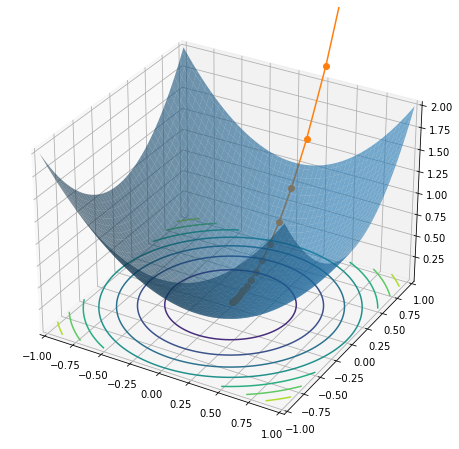

In [329]:
trace = grad_descend(grad, 0.1, 20)
plot_grad(fun, trace = trace)

→ Также можете попробовать прописать другие функции или варьировать длину шага — эксперименты помогут лучше прочувствовать работу метода.



## ГРАДИЕНТНЫЙ СПУСК С MOMENTUM

Поговорим об усовершенствованном варианте градиентного спуска , который носит название **«градиентный спуск с momentum»**. Это не единственный вид градиентного спуска, но один из самых известных. Про все остальные виды мы ещё поговорим в дальнейшем.

Заметим, что для ускорения спуска было бы неплохо учитывать изменения на предыдущем шаге. На примере ниже мы видим, как алгоритм колеблется в разные стороны вокруг одной прямой. Было бы здорово явно указать алгоритму держаться ближе к прямой и двигаться вдоль неё.

![](https://lms.skillfactory.ru/assets/courseware/v1/9adbdb3d799afde8d4061a5686f1b0a7/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_7_12.png)

Решить эту проблему как и позволяет градиентный спуск с momentum. Формально его можно определить следующим образом:

$$x^{(n+1)} = x^{(n)} - \gamma \nabla f (x^{(n)}) + \alpha (x^{(n)} - x^{(n-1)})$$

Вы можете заметить, что формула осталась той же, но справа прибавилось ещё одно слагаемое, зависящее от разницы координат текущей и предыдущей точек.

Идея заключается в том, что на каждой итерации градиентного спуска  изменяется градиент, помноженный не только на темп обучения, но и на вектор, на который мы передвинулись в предыдущем шаге, с некоторым коэффициентом.

В формуле выше $\alpha$ — это параметр, который показывает, насколько учитывается предыдущий шаг.

Для прошлого примера это работает так: точка начинает двигаться вдоль прямой (которую можно представить, если соединить точки A и Local Optima), ведущей к локальному минимуму.

![](https://lms.skillfactory.ru/assets/courseware/v1/3a2239242e607d99ccd0d83e5ca4531d/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/MATHML_md5_7_13.png)

→ Это помогает ускорить сходимость алгоритма. В целом, это лишь одна из вариаций алгоритма градиентного спуска, и мы можем использовать её для увеличения качества. Ограничения тут ровно такие же, как и у обычного градиентного спуска. Нельзя утверждать, что этот метод всегда лучше других в тех или иных ситуациях — это просто ещё один инструмент, которым можно пользоваться при решении задач.

Итак, мы познакомились с алгоритмом градиентного спуска и разобрали принцип его работы. Теперь, когда теоретическая база подготовлена, осталось повторить пройденное и перейти к следующему юниту, чтобы уже использовать градиентный спуск для решения практической задачи — прогнозирования объёмов продаж в рамках решения задачи линейной регрессии.

### Задание 7.7

Найдите следующую точку градиентного спуска для функции $f(x)=2x^2-4xz+4y^2-8yz+9z^2+4x+8y-20z$, если текущая точка — $(0, 0, 0)$, $\gamma =0.25$. 

In [330]:
x, y, z = symbols('x y z')
gamma =0.25
f = 2*x**2 - 4*x*z + 4*y**2 - 8*y*z + 9*z**2 + 4*x + 8*y -20*z

grd = np.array([
    f.diff(x).subs([(x, 0), (y, 0), (z, 0)]),
    f.diff(y).subs([(x, 0), (y, 0), (z, 0)]),
    f.diff(z).subs([(x, 0), (y, 0), (z, 0)])
]).T

-gamma*grd


array([-1.00000000000000, -2.00000000000000, 5.00000000000000],
      dtype=object)

# 8. Практика: градиентный спуск

✍ В предыдущих модулях вы научились решать задачу линейной регрессии с помощью специальных библиотек (например, sklearn). Однако, по сути, вы лишь готовили данные, передавали их алгоритму, и он полностью сам реализовывал обучение модели. В этом юните мы научимся самостоятельно, с нуля писать алгоритм обучения линейной регрессии, по шагам разберём, как он выстраивается, и сравним наши результаты с готовым алгоритмом из библиотеки sklearn (скажем сразу — наш результат будет не хуже). Это поможет вам понимать принцип его работы. Ведь одно дело — просто передавать данные «чёрному ящику», и совсем другое — осознавать суть и принципы поэтапной реализации алгоритма.

### Задание 8.1

Найдите минимум функции $2x^2 - 4xy + y^4 + 2$ с помощью градиентного спуска.

Обратите внимание, что не стоит начинать градиентный спуск из точки локального экстремума, так как это ведёт к «застреванию» алгоритма в нём.

Ответ округлите до целого числа.

In [366]:
x, y = symbols('x y')

f = 2*x**2 - 4*x*y + y**4 + 2



print('dx = ', f.diff(x))
print('dy = ', f.diff(y))

eq1 = Eq(f.diff(x), 0)
eq2 = Eq(f.diff(y), 0)

print('Точки экстремумов: ', solve([eq1, eq2], [x, y]))

dx =  4*x - 4*y
dy =  -4*x + 4*y**3
Точки экстремумов:  [(-1, -1), (0, 0), (1, 1)]


In [376]:
def f(x, y):
    return 2*x**2 - 4*x*y + y**4 + 2

def grad(x, y):
    dx = 4*x - 4*y
    dy = -4*x + 4*y**3
    return (dx, dy)


x0 = (-2, 2)
gamma = 0.01
x_cur = x0

vals = []
coords = []
i = 0

while True:
    x_new = (x_cur[0] - gamma * grad(*x_cur)[0],
            x_cur[1] - gamma * grad(*x_cur)[1])
    if i > 1000:
        break
    x_cur = x_new
    vals.append(f(*x_cur))
    coords.append(x_cur)
    i += 1
    print(f"iter={i}; x=({x_cur[0]:.4f}, {x_cur[1]:.4f});"
          f" f(x)={f(*x_cur):.4f}; grad f(x)=({grad(*x_cur)[0]:.4f}, {grad(*x_cur)[1]:.4f})")

iter=1; x=(-1.8400, 1.6000); f(x)=27.1008; grad f(x)=(-13.7600, 23.7440)
iter=2; x=(-1.7024, 1.3626); f(x)=20.5217; grad f(x)=(-12.2598, 16.9284)
iter=3; x=(-1.5798, 1.1933); f(x)=16.5596; grad f(x)=(-11.0923, 13.1157)
iter=4; x=(-1.4689, 1.0621); f(x)=13.8283; grad f(x)=(-10.1240, 10.6682)
iter=5; x=(-1.3676, 0.9554); f(x)=11.8010; grad f(x)=(-9.2923, 8.9593)
iter=6; x=(-1.2747, 0.8658); f(x)=10.2267; grad f(x)=(-8.5622, 7.6953)
iter=7; x=(-1.1891, 0.7889); f(x)=8.9675; grad f(x)=(-7.9119, 6.7202)
iter=8; x=(-1.1100, 0.7217); f(x)=7.9396; grad f(x)=(-7.3267, 5.9434)
iter=9; x=(-1.0367, 0.6623); f(x)=7.0881; grad f(x)=(-6.7958, 5.3086)
iter=10; x=(-0.9687, 0.6092); f(x)=6.3752; grad f(x)=(-6.3117, 4.7792)
iter=11; x=(-0.9056, 0.5614); f(x)=5.7733; grad f(x)=(-5.8680, 4.3302)
iter=12; x=(-0.8470, 0.5181); f(x)=5.2618; grad f(x)=(-5.4601, 3.9440)
iter=13; x=(-0.7924, 0.4786); f(x)=4.8251; grad f(x)=(-5.0839, 3.6080)
iter=14; x=(-0.7415, 0.4426); f(x)=4.4507; grad f(x)=(-4.7363, 3.3127)
i

### Задание 8.2

Найдите минимум функции $x^3 - 2x^2 + y^2 + z^2 - 2xy + xz - yz + 3z$ с помощью градиентного спуска.

Ответ округлите до целого числа.

In [390]:
x, y, z = symbols('x y z')

f = x**3 - 2*x**2 + y**2 + z**2 - 2*x*y + x*z -y*z + 3*z



print('dx = ', f.diff(x))
print('dy = ', f.diff(y))
print('dz = ', f.diff(z))


eq1 = Eq(f.diff(x), 0)
eq2 = Eq(f.diff(y), 0)
eq3 = Eq(f.diff(z), 0)

print('Точки экстремумов: ', solve([eq1, eq2, eq3], [x, y, z]))

dx =  3*x**2 - 4*x - 2*y + z
dy =  -2*x + 2*y - z
dz =  x - y + 2*z + 3
Точки экстремумов:  [(0, -1, -2), (2, 1, -2)]


In [397]:
def f(x, y, z):
    return x**3 - 2*x**2 + y**2 + z**2 - 2*x*y + x*z -y*z + 3*z

def grad(x, y, z):
    dx =  3*x**2 - 4*x - 2*y + z
    dy =  -2*x + 2*y - z
    dz =  x - y + 2*z + 3
    return (dx, dy, dz)


x0 = (0, 0, 0)
gamma = 0.1
x_cur = x0

vals = []
coords = []
i = 0

while True:
    x_new = (x_cur[0] - gamma * grad(*x_cur)[0],
            x_cur[1] - gamma * grad(*x_cur)[1],
            x_cur[2] - gamma * grad(*x_cur)[2])
    if i > 100:
        break
    x_cur = x_new
    vals.append(f(*x_cur))
    coords.append(x_cur)
    i += 1
    print(f"iter={i}; x=({x_cur[0]:.2f}, {x_cur[1]:.2f}, {x_cur[2]:.2f});"
          f" f(x)={f(*x_cur):.2f}; grad f(x)=({grad(*x_cur)[0]:.2f}, {grad(*x_cur)[1]:.2f})")

iter=1; x=(0.00, 0.00, -0.30); f(x)=-0.81; grad f(x)=(-0.30, 0.30)
iter=2; x=(0.03, -0.03, -0.54); f(x)=-1.36; grad f(x)=(-0.60, 0.42)
iter=3; x=(0.09, -0.07, -0.74); f(x)=-1.79; grad f(x)=(-0.93, 0.41)
iter=4; x=(0.18, -0.11, -0.91); f(x)=-2.17; grad f(x)=(-1.31, 0.31)
iter=5; x=(0.31, -0.14, -1.05); f(x)=-2.59; grad f(x)=(-1.72, 0.14)
iter=6; x=(0.49, -0.16, -1.19); f(x)=-3.10; grad f(x)=(-2.11, -0.10)
iter=7; x=(0.70, -0.15, -1.32); f(x)=-3.73; grad f(x)=(-2.35, -0.37)
iter=8; x=(0.93, -0.11, -1.44); f(x)=-4.45; grad f(x)=(-2.34, -0.65)
iter=9; x=(1.17, -0.05, -1.55); f(x)=-5.15; grad f(x)=(-2.05, -0.87)
iter=10; x=(1.37, 0.04, -1.66); f(x)=-5.73; grad f(x)=(-1.59, -0.99)
iter=11; x=(1.53, 0.14, -1.76); f(x)=-6.14; grad f(x)=(-1.14, -1.01)
iter=12; x=(1.64, 0.24, -1.85); f(x)=-6.42; grad f(x)=(-0.80, -0.95)
iter=13; x=(1.72, 0.34, -1.92); f(x)=-6.61; grad f(x)=(-0.57, -0.85)
iter=14; x=(1.78, 0.42, -1.98); f(x)=-6.73; grad f(x)=(-0.42, -0.74)
iter=15; x=(1.82, 0.50, -2.02); f(x)=-6.

### Задание 8.3

Попробуем применить градиентный спуск для решения реальной задачи линейной регрессии. Наша цель будет состоять в том, чтобы построить простую модель линейной регрессии для прогнозирования продаж некоторого продукта на основе количества денег, потраченных на рекламу.

Постройте модель с тремя предикторами.

Все веса изначально возьмите равными , скорость обучения задайте как  и обучите модель на  итераций.

В качестве ответов введите полученные веса для трех предикторов. Ответы округлите до третьего знака после точки-разделителя.

In [398]:
import numpy as np
import pandas as pd

df = pd.read_csv('data/Advertising.csv',index_col=0)

df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [408]:
X = df.drop(columns = 'sales')
y = df['sales']
n = len(y)
X = np.append(np.ones((n,1)), X, axis = 1)
y = df['sales'].values.reshape(n,1)
par = np.zeros((4,1))

In [409]:
def cost_function(X, y , par):
    y_pred = np.dot(X, par)
    error = (y_pred - y)**2
    cost = 1/(n)*np.sum(error)
    return cost

In [410]:
def grad_d(X,y, par, alpha, iterations):
    costs = []
    for i in range(iterations):
        y_pred = np.dot(X, par)
        der = np.dot (X.transpose(), (y_pred - y))/ n
        par -= alpha * der
        costs.append(cost_function(X,y, par))
    return par, costs

In [419]:
par, costs = grad_d(X,y, par, 0.00005, 500000)

par.round(3)

array([[ 2.937e+00],
       [ 4.600e-02],
       [ 1.890e-01],
       [-1.000e-03]])

# 9. Итоги

✍ В данном модуле мы:

* научились работать с **функциями нескольких переменных**, а также находить для них производные и изучать их поведение;
* познакомились с основами **оптимизации** — важной области математики, неразрывно связанной с машинным обучением;
* изучили один из ключевых алгоритмов — **градиентный спуск**.

Тема оптимизации гораздо обширнее той небольшой части, которую мы успели обсудить. В следующем модуле мы закрепим полученные знания, рассмотрим новые методы оптимизации и разберём практические кейсы, в которых вам предстоит выбрать наиболее подходящие алгоритмы для решения поставленных задач.

**ДОПОЛНИТЕЛЬНО**

Если вы интересуетесь оптимизацией и хотели бы углубить свои знания, рекомендуем вам обратиться к следующим ресурсам ↓

* [Бесплатный курс по выпуклой оптимизации от Стэнфордского университета](https://www.edx.org/course/convex-optimization?index=product&queryID=89bc469144f0bb12e2a2fe0e217ccd02&position=1)
* [S. Boyd, L. Vandenberghe "Convex Optimization"](https://stanford.edu/~boyd/cvxbook/)
* [Ю. Е. Нестеров «Методы выпуклой оптимизации»](https://www.benfrederickson.com/numerical-optimization/)
* [Интерактивные представления различных методов оптимизации](https://www.benfrederickson.com/numerical-optimization/)

На данном этапе часть этих материалов может показаться вам сложной, но уже после следующего модуля большинство методов станут для вас узнаваемыми.